In [ ]:
# import import_ipynb
# %run data_analysis_function.ipynb


# pd.datetime(df.column, unit ='ms')

In [3]:
import numpy as np
a = np.zeros((156816, 36, 53806), dtype='uint8')

In [2]:
# import data_analysis_function

In [3]:
# from ipynb.fs.full.data_analysis_function import create_dataframe
# from ipynb.fs.full.data_analysis_function import conversion_timestamp_to_unixtime

In [4]:
# from ipynb.fs.full.data_analysis_function import remove_rw_column

In [4]:
import json
import collections
import os
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn import linear_model
from sklearn import tree

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from dataset_analysis import create_dataframe
from dataset_analysis import conversion_timestamp_to_unixtime
from dataset_analysis import remove_rw_column
from dataset_analysis import alter_time
from dataset_analysis import rearrange_frame
from dataset_analysis import drop_zero_value_row_of_blast_furnace_signal
from dataset_analysis import drop_zero_value_row_of_target_signal

from dataset_analysis import check_A_B_blast_furnace
from dataset_analysis import no_zero_value_in_target

from dataset_analysis import drop_column_with_same_value
from dataset_analysis import drop_nan_value
from dataset_analysis import drop_row
from dataset_analysis import drop_string_column
from dataset_analysis import feature_selection_with_selectKbest
from dataset_analysis import pearson_correlation
from dataset_analysis import make_dataframe_with_high_correlated_value
from dataset_analysis import dataframe_date_time_type
from dataset_analysis import my_sum
from dataset_analysis import draw_graph
from dataset_analysis import draw_feature_vs_target

In [5]:
from dataset_analysis import remove_rw_column_1

In [6]:
from model_file import make_dataset
from model_file import scikit_learn_model
from model_file import plot_graph
from model_file import evaluation_metrices

In [7]:
with open('variable_config.json', 'r') as f:
    config = json.load(f)

filepath = config['DEFAULT']['file_path']
filepath_ubuntu = config['DEFAULT']['file_path_ubuntu']
filepath_ubuntu_1 = config['DEFAULT']['file_path_ubuntu_1']
filepath_server = config['DEFAULT']['file_path_server']
start_pos = config['DEFAULT']['start_point_dataframe']
end_pos = config['DEFAULT']['end_point_dataframe']
date_column = config['DEFAULT']['date_column']
target_column = config['DEFAULT']['target_column']
req_drop_value_target = config['DEFAULT']['req_drop_value_target']
furnace_signal_column_a = config['DEFAULT']['blast_furnace_signal_a']
furnace_signal_column_b = config['DEFAULT']['blast_furnace_signal_b']
value_A = config['DEFAULT']['req_value_of_blast_furnace_A']
value_B = config['DEFAULT']['req_value_of_blast_furnace_B']
max_best_number = config['DEFAULT']['max_best_number']
correlation_threshold_min_value = config['DEFAULT']['correlation_threshold_min_value']
correlation_threshold_max_value = config['DEFAULT']['correlation_threshold_max_value']
subfolder_feature_vs_target = config['DEFAULT']['subfolder_feature_vs_target']
evaluation_metrics_file_name = config['DEFAULT']['evaluation_metrics_file']
# print(type(correlation_threshold_min_value))
print(correlation_threshold_max_value)
print(correlation_threshold_min_value)

0.9
0.5


In [8]:
initial_dataframe = create_dataframe(filepath_ubuntu_1)

In [9]:
initial_dataframe_sort = initial_dataframe.sort_index()

In [10]:
df_1 = initial_dataframe_sort.copy()
df_1['dateTime'] = pd.to_datetime(initial_dataframe_sort['longTime'], unit='ms')

In [11]:
df_1.head()

,row ID,longTime,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,...,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,dateTime
0,Row0,1555311120000,74.451979,19.111606,98.371549,18.819155,93.337524,69.969526,95.445534,7.802471,...,92.632593,44.620461,22.338103,75.685755,73.945394,0.000000,0.000000,0.000000,0.000000,2019-04-15 06:52:00
1,Row1,1555311060000,73.933103,18.088026,98.186038,18.943335,92.869960,69.969526,95.445534,12.856953,...,82.082055,53.182296,26.967692,75.685755,66.649583,56.385432,68.734584,9.127668,2.275890,2019-04-15 06:51:00
2,Row2,1555311000000,73.471742,25.843589,98.371549,33.166077,92.343799,69.969526,95.628479,21.591973,...,82.098144,53.029243,26.851837,75.685755,66.587330,56.402658,68.853203,9.136596,2.275735,2019-04-15 06:50:00
3,Row3,1555310940000,73.010381,27.772137,98.371549,35.991205,91.876236,69.850105,95.607810,19.492370,...,82.074011,53.015226,26.266369,75.685755,66.373907,56.527297,69.391059,9.138625,2.281882,2019-04-15 06:49:00
4,Row4,1555310880000,72.549020,18.402556,98.186038,19.591687,91.408672,69.969526,95.607810,8.014898,...,82.078296,53.172932,26.605640,75.685755,66.529224,56.640964,69.299560,9.121256,2.269317,2019-04-15 06:48:00


In [12]:
df_1.tail()

,row ID,longTime,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,...,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,dateTime
24995,Row24995,1552270680000,73.875587,26.183628,94.247637,26.243646,84.862783,67.635740,95.486096,16.656556,...,92.467179,44.620461,35.372044,82.999752,80.398505,69.927938,74.680827,0.390438,5.434438,2019-03-11 02:18:00
24996,Row24996,1552270620000,73.414226,25.111296,94.247637,20.460754,84.336621,67.501116,95.648382,8.682349,...,92.458005,44.620461,36.388113,82.644399,80.584952,69.763910,74.112424,0.396539,5.446945,2019-03-11 02:17:00
24997,Row24997,1552270560000,72.952865,16.340439,94.083085,9.402699,83.810765,67.501116,95.648382,7.900882,...,92.484799,44.620461,33.680038,82.812397,79.820670,69.482925,75.118191,0.391758,5.461172,2019-03-11 02:16:00
24998,Row24998,1552270500000,72.491504,26.431470,94.083085,27.250685,82.875638,67.530966,95.648382,15.316148,...,92.521725,44.620461,30.234661,82.718776,78.744878,67.904313,74.995147,0.391870,5.464381,2019-03-11 02:15:00
24999,Row24999,1552270440000,72.030143,21.542766,94.083085,22.656925,82.875638,67.650387,95.811415,11.299942,...,92.507129,44.620461,28.127074,82.825607,78.104338,67.050713,75.017129,0.385938,5.503583,2019-03-11 02:14:00


In [13]:
try:
    df_1 = df_1.drop(['row ID'], axis = 1)
except:
    df_1 = df_1

In [14]:
df_1.head(1)

,longTime,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,...,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,dateTime
0,1555311120000,74.451979,19.111606,98.371549,18.819155,93.337524,69.969526,95.445534,7.802471,57.766387,...,92.632593,44.620461,22.338103,75.685755,73.945394,0.0,0.0,0.0,0.0,2019-04-15 06:52:00


In [36]:
df_2.columns.get_loc(target_column)
print(df_2.columns[4142])
target_df = df_2.loc[:, df_2.columns[4142]]

AEWIHO_T9AV2


In [38]:
targ = pd.DataFrame(target_df)

In [42]:
targ.tail(2)

,AEWIHO_T9AV2
dateTime,
2019-03-11 02:15:00,81.659117
2019-03-11 02:14:00,79.178306


In [17]:
df_copy = df_1.copy()
df_2 = df_copy.set_index('dateTime')

In [18]:
df_month = pd.DataFrame(index=df_2.index)

In [21]:
df_month['year'] = pd.DatetimeIndex(df_month.index).year

In [24]:
df_month['month'] = pd.DatetimeIndex(df_month.index).month

In [43]:
# df_month

In [45]:
df_month_final = pd.concat([df_month, target_df], axis=1)
df_month_final.head()

,year,month,AEWIHO_T9AV2
dateTime,,,
2019-04-15 06:52:00,2019,4,78.101485
2019-04-15 06:51:00,2019,4,78.222914
2019-04-15 06:50:00,2019,4,78.361331
2019-04-15 06:49:00,2019,4,78.450988
2019-04-15 06:48:00,2019,4,78.780987


In [57]:
pd.DataFrame(list(dict_of_month.items()), columns=['A','B'])

,A,B
0,3,year month AEWIHO_T9AV2...
1,4,year month AEWIHO_T9AV2...


In [46]:
dict_of_month = {k:v for k,v in df_month_final.groupby('month')}
month_key_value = collections.OrderedDict(dict_of_month)

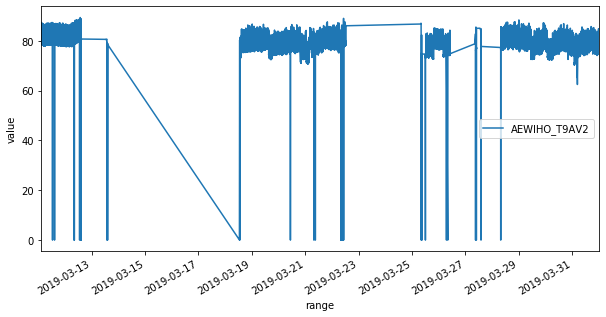

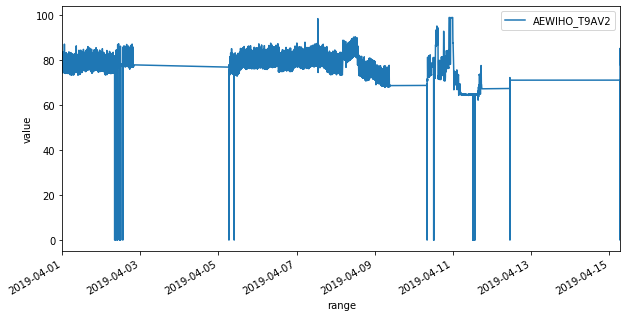

In [52]:
for i in month_key_value:
    value = dict_of_month[i]
    value.iloc[:].plot(y=[target_column])
#     plt.title('visualization of signal ' + str(target) + ' in time of ' + str(i))
    plt.xlabel('range')
    plt.ylabel('value')

    plt.rcParams['figure.figsize'] = (10,5)
#     plt.savefig(fig_location + '/' + str(i) + '.jpg')
    plt.show()

In [58]:
def distinct_month(dataframe, target_column, req_drop_value_target):
    req_data_1=dataframe.loc[(dataframe[target_column]!=req_drop_value_target)]
    req_frame_1=pd.DataFrame(req_data_1,columns=dataframe.columns)
    
    return req_frame_1

df_march = distinct_month(df_month_final,'month', 4)

In [62]:
df_march.tail()

,year,month,AEWIHO_T9AV2
dateTime,,,
2019-03-11 02:18:00,2019,3,87.266264
2019-03-11 02:17:00,2019,3,87.113691
2019-03-11 02:16:00,2019,3,86.055430
2019-03-11 02:15:00,2019,3,81.659117
2019-03-11 02:14:00,2019,3,79.178306


In [ ]:
# u = initial_dataframe.columns.get_loc("DEWIHOAT9_I0")
# v = initial_dataframe.columns.get_loc("DEWIHOBT9_I0")
# w = initial_dataframe.columns.get_loc("DEWIHOAT8_I0")
# x = initial_dataframe.columns.get_loc("DEWIHOBT8_I0")
# print(u,v,w,x)

# plotted blast furnace A and B for Turbine 8's output

In [ ]:
# print(initial_dataframe.shape)
# plt.plot(initial_dataframe["AEWIHO_T8AV2"], color = 'blue')
# plt.plot(initial_dataframe["DEWIHOBT8_I0"], color = 'red')
# plt.plot(initial_dataframe["DEWIHOAT8_I0"], color = 'black')
# plt.legend(["AEWIHO_T8AV2", "DEWIHOBT8_I0","DEWIHOAT8_I0"], loc='upper left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (20, 10)

# plotted blast furnace A and B for Turbine 9's output

In [ ]:
print(initial_dataframe.shape)
plt.plot(initial_dataframe[target_column], color = 'blue')
plt.plot(initial_dataframe[furnace_signal_column_a], color = 'red')
plt.plot(initial_dataframe[furnace_signal_column_b], color = 'black')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (10, 5)

In [13]:
# test_new = conversion_timestamp_to_unixtime(initial_dataframe)

In [19]:
# test_new.shape

(25000, 4220)

In [18]:
test_new = df_1

In [21]:
# test_new_1 = test_new.drop(['row ID'], axis = 1) # need it if dataset made fro KNIME using ROW_ID
test_new_1 = test_new

In [22]:
test_new_2 = remove_rw_column_1(test_new_1,'RW')

In [24]:
test_new_2.shape
# test_new_2.shape[0]

25000

In [25]:

# Taking define number of row from the beginning
# multivariate_data = alter_time(test_new_2, start_pos, test_new.shape[0])
multivariate_data = alter_time(test_new_2, start_pos,test_new_2.shape[0])

In [29]:
index_array=[0,-1]
req_column_name = [date_column, target_column]
# req_column_name = [date_column, furnace_signal_column]
rearranged_dataframe = rearrange_frame(multivariate_data,req_column_name,index_array)

In [30]:
print(type(multivariate_data), multivariate_data.shape)
print(type(rearranged_dataframe), rearranged_dataframe.shape)

<class 'pandas.core.frame.DataFrame'> (25000, 3966)
<class 'pandas.core.frame.DataFrame'> (25000, 3966)


In [31]:
def check_A_B_blast_furnace_1(dataframe,furnace_signal_column_a,value_A, furnace_signal_column_b,value_B):
    req_data=dataframe.loc[(dataframe[furnace_signal_column_a]>=value_A) | (dataframe[furnace_signal_column_b]>=value_B)]
    req_frame=pd.DataFrame(req_data,columns=dataframe.columns)
    
    return req_frame

dataframe_no_zero_value_blast_furnace = check_A_B_blast_furnace_1(rearranged_dataframe, furnace_signal_column_a, value_A,
                                                               furnace_signal_column_b, value_B)

In [ ]:
dataframe_no_zero_value_blast_furnace.dtypes

In [ ]:
# no_zero_furnace_1 = check_A_B_blast_furnace(rearranged_dataframe, furnace_signal_column_a, value_A,
#                                                                furnace_signal_column_b, value_B)

In [ ]:
# no_zero_furnace_1.dtypes

In [ ]:
# print(no_zero_furnace.shape)
# print(type(no_zero_furnace))

# print(no_zero_furnace_1.shape)
# print(type(no_zero_furnace_1))


# rearranged_dataframe.head()

In [ ]:
# new_frame = pd.concat([first_col, sec_col], axis=1)

In [ ]:
# for i in rearranged_dataframe:
#     if rearranged_dataframe[i].dtypes == 'object':
# #         rearranged_dataframe.loc[:,i].apply(pd.to_numeric)
        
#         print(i)

In [ ]:
# for i in rearranged_dataframe:
#     if rearranged_dataframe[i].dtypes == '<M8[ns]' or rearranged_dataframe[i].dtypes == 'object':
# #         rearranged_dataframe.loc[:,i].apply(pd.to_numeric)
        
#         print(i)
    

In [ ]:
# increase_1=0
# count_array_2 = []
# for i,v in enumerate(rearranged_dataframe[furnace_signal_column_a]):
    
#     if v < 98 and rearranged_dataframe.iloc[i][furnace_signal_column_b] <100:
        
# #         print("i: ",i," ,blast A: ",v," ,blast B: ",rearranged_dataframe.iloc[i][furnace_signal_column_b])
#         count_array_2 = np.append(count_array_2, i)
#         increase_1+=1

In [32]:
def no_zero_value_in_target_1(dataframe, target_column, req_drop_value_target):
    req_data_1=dataframe.loc[(dataframe[target_column]!=req_drop_value_target)]
    req_frame_1=pd.DataFrame(req_data_1,columns=dataframe.columns)
    
    return req_frame_1

dataframe_no_zero_value_target_column = no_zero_value_in_target_1(dataframe_no_zero_value_blast_furnace,target_column, req_drop_value_target)

In [33]:
# plt.plot(dataframe_no_zero_value_blast_furnace[target_column], color = 'blue')
# plt.plot(dataframe_no_zero_value_blast_furnace[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_no_zero_value_blast_furnace[furnace_signal_column_b], color = 'green')
# # plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (10, 5)

In [34]:
print(rearranged_dataframe.shape)
print(dataframe_no_zero_value_blast_furnace.shape)
print(dataframe_no_zero_value_target_column.shape)

(25000, 3966)
(24240, 3966)
(24148, 3966)


In [35]:
dataframe_no_zero_value_target_column_1 = dataframe_no_zero_value_target_column.reset_index()
dataframe_no_zero_value_target_column_2 = dataframe_no_zero_value_target_column_1.drop(['index'], axis=1)
dataframe_no_zero_value_target_column_2.shape

(24148, 3966)

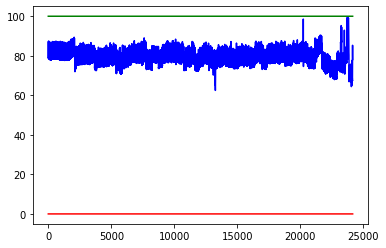

In [37]:
plt.plot(dataframe_no_zero_value_target_column_2[target_column], color = 'blue')
plt.plot(dataframe_no_zero_value_target_column_2[furnace_signal_column_a], color = 'red')
plt.plot(dataframe_no_zero_value_target_column_2[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
# dataframe_no_zero_value_target_column = no_zero_value_in_target(dataframe_no_zero_value_blast_furnace,target_column, req_drop_value_target)

In [ ]:
# qq = dataframe_no_zero_value_target_column.apply(pd.to_numeric)

In [ ]:
# qq['dateTime'].dtypes

In [ ]:
# drop_object = dataframe_no_zero_value_target_column.select_dtypes(exclude=['object'])

In [ ]:
# Drop the column which has sam evalue in every ROW
# dataframe_drop_column_with_same_value = drop_column_with_same_value(dataframe_no_zero_value_target_column)

In [39]:

# Drop the ROW which has NAN value
multivariate_data_drop_nan = drop_nan_value(dataframe_no_zero_value_target_column_2)

In [40]:
nunique = multivariate_data_drop_nan.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
dataframe_drop_column_with_same_value = multivariate_data_drop_nan.drop(cols_to_drop, axis=1)

In [ ]:
# dataframe_drop_column_with_same_value = drop_column_with_same_value(multivariate_data_drop_nan)

In [42]:
print(type(dataframe_drop_column_with_same_value))
print(dataframe_drop_column_with_same_value.shape)
dataframe_drop_column_with_same_value.head(1)

<class 'pandas.core.frame.DataFrame'>
(24148, 2676)


,dateTime,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,...,AEWIHOC_MWT0,AEWIHOCM__P0,AEWIHOC___P0,AEWIHOCKZ_V0,AEWIHOCK__V9,AEWIHOCWF_A2,AEWIHOC___T0,AEWIHOCWF_A1,AEWIHOAKVSV0,AEWIHO_T9AV2
0,2019-03-11 02:14:00,72.030143,21.542766,94.083085,22.656925,82.875638,67.650387,95.811415,11.299942,60.849423,...,74.492332,69.603678,69.804147,0.0,59.499933,63.256942,54.447036,9.526666,87.871569,79.178306


In [43]:
dataframe_drop_column_with_same_value.dtypes

dateTime        datetime64[ns]
AEAGHOAWE2T1           float64
AEAGHOAWE2A0           float64
AEAGHOAWE2T0           float64
AEAGHOAWE1A0           float64
                     ...      
AEWIHOCWF_A2           float64
AEWIHOC___T0           float64
AEWIHOCWF_A1           float64
AEWIHOAKVSV0           float64
AEWIHO_T9AV2           float64
Length: 2676, dtype: object

In [ ]:
# Drop the row who has consecutive same value
# dataframe_drop_row_consecutive_same_value = drop_row(multivariate_data_drop_nan)

In [ ]:
# dataframe_drop_row_consecutive_same_value= multivariate_data_drop_nan

In [44]:
# Drop the column who has 'objet' type value
dataframe_no_string = drop_string_column(dataframe_drop_column_with_same_value)

In [45]:
dataframe_no_string.dtypes

dateTime        datetime64[ns]
AEAGHOAWE2T1           float64
AEAGHOAWE2A0           float64
AEAGHOAWE2T0           float64
AEAGHOAWE1A0           float64
                     ...      
AEWIHOCWF_A2           float64
AEWIHOC___T0           float64
AEWIHOCWF_A1           float64
AEWIHOAKVSV0           float64
AEWIHO_T9AV2           float64
Length: 2676, dtype: object

In [46]:
# def remove_rw_column_1(dataframe,req_string):
#     print(req_string)
#     new_variable = []
#     for i in dataframe:
#         x = i[:2]
#         if x != req_string:
#             new_variable = np.append(new_variable, i)
    
#     dataframe = dataframe.iloc[:][new_variable]
#     return dataframe

In [47]:
# no_DE = remove_rw_column_1(dataframe_no_string,'DE')

In [48]:
# no_CW = remove_rw_column_1(no_DE,'CW')

In [49]:
# dataframe_drop_row_consecutive_same_value = drop_row(no_CW)

In [50]:
print(dataframe_no_string.shape)
print(no_DE.shape)
print(no_CW.shape)
print(dataframe_drop_row_consecutive_same_value.shape)

(24148, 2676)
(24148, 1820)
(24148, 1784)
(24127, 1784)


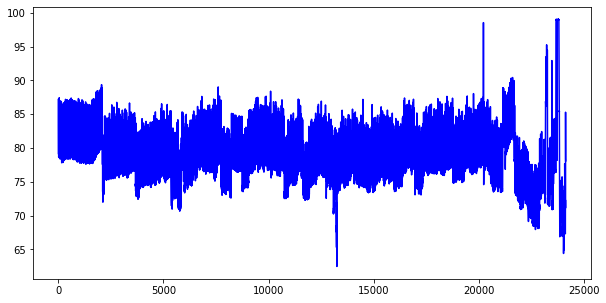

In [51]:
plt.plot(dataframe_drop_row_consecutive_same_value[target_column], color = 'blue')
# plt.plot(dataframe_no_zero_value_target_column[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_no_zero_value_target_column[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (10, 5)

# drop column who has always same value

In [ ]:
# new_frame = multivariate_data_drop_nan.drop(multivariate_data_drop_nan.std()[(multivariate_data_drop_nan.std() == 0)].index, axis=1)

In [ ]:
# cols = multivariate_data_drop_nan.select_dtypes([np.number]).columns
# diff = multivariate_data_drop_nan[cols].diff().sum()
# no_same_value_column = multivariate_data_drop_nan.drop(diff[diff == 0].index, axis=1)

In [ ]:
# print(dataframe_drop_column_with_same_value.shape)
# print(multivariate_data_drop_nan.shape)
# print(dataframe_drop_row_consecutive_same_value.shape)
# print(dataframe_no_string.shape)
# print(new_frame.shape)

In [133]:
# Make dataframe with dateTime index
dataframe_datetime = dataframe_no_string.set_index('dateTime')

In [134]:
dataframe_datetime = dataframe_datetime.drop(['longTime'], axis = 1)

In [136]:
dataframe_datetime.shape

(24148, 2674)

In [ ]:
# Feature selection with Sklearn feature best technique
sklearn_feature_best_dataframe = feature_selection_with_selectKbest(dataframe_datetime,max_best_number)

In [56]:
# feature selection with Pearson Correlation.

sklearn_correlation, main_correlation = pearson_correlation(sklearn_feature_best_dataframe, dataframe_datetime)

In [117]:
# make a dataframe with signal who is lies between a given range of correlation threshold value
main_frame = dataframe_datetime
correlated_frame = main_correlation

# main_frame = sklearn_feature_best_dataframe
# correlated_frame = sklearn_correlation

dataframe_high_correlation = make_dataframe_with_high_correlated_value(main_frame,correlated_frame,
                                                             correlation_threshold_min_value, correlation_threshold_max_value)

In [118]:
print(dataframe_high_correlation.shape)
# plt.plot(dataframe_high_correlation['AEWIHOBKF_V0'])
dataframe_high_correlation.describe()

(24127, 42)


,AEDAHO_T9_V2,AEDATZ_HO_V0,AEELHOBTURE0,AEELHOB_MWE0,AEELHOB_MWE1,ZEELHOBERZE0,AEEGHOA_KGV0,AEHGHOBKOPP0,AEHGHOB_DPP0,AEHGHOBSTRP1,...,AEWIGHG9__P0,AEWIGHG9__T0,AEWIHOBK__V0,AEWIHOBM__P0,AEWIHOBKVSV0,AEWIHOBKF_V0,AEWIHOBK__T0,AEWIHOBKNSP0,AEWIHOBKVSP0,AEWIHO_T9AV2
count,24127.000000,24127.000000,2.412700e+04,24127.000000,24127.000000,24127.000000,24127.000000,24127.000000,24127.000000,24127.000000,...,24127.000000,24127.000000,24127.000000,2.412700e+04,24127.000000,24127.000000,24127.000000,24127.000000,24127.000000,24127.000000
mean,70.269573,41.812889,6.762468e+01,62.212753,64.742535,69.081676,0.547172,72.151858,74.759760,72.328603,...,82.006981,86.229298,83.785075,7.982118e+01,78.953235,9.896369,85.162117,79.741507,79.715390,77.347292
std,7.382223,5.326250,1.329032e+01,13.178229,14.046580,13.584042,4.870754,8.845509,8.944586,7.848178,...,7.285506,5.261650,8.162156,7.530448e+00,6.666988,24.134772,5.245304,7.368250,7.251670,3.898087
min,0.000000,0.000000,4.440892e-16,0.000562,0.000000,0.000000,0.000000,0.039409,0.000000,0.057092,...,18.258251,47.118729,0.000000,1.110223e-16,0.000000,0.000000,0.000000,0.348955,0.398818,62.483956
25%,67.232102,39.055674,6.248780e+01,57.491174,59.544974,64.788733,0.000000,69.591551,70.745815,69.630037,...,78.701758,82.926780,80.852311,7.672490e+01,76.077496,0.000000,81.974818,76.601353,76.589684,75.223040
50%,70.772747,41.148914,6.993977e+01,64.613442,67.206968,71.629731,0.000000,73.397391,75.937618,73.374699,...,83.338930,86.719346,84.487262,8.119786e+01,79.360667,0.000000,85.684263,81.113865,81.071483,76.867057
75%,74.244639,43.980007,7.676943e+01,71.103413,74.296730,78.873239,0.000000,78.306891,80.142501,78.291205,...,87.016633,89.987777,88.766572,8.472344e+01,83.183950,0.000000,88.905087,84.613874,84.624347,78.431484
max,99.451639,81.858572,9.779535e+01,90.929128,95.199080,96.175373,61.065903,100.000000,96.499264,100.000000,...,99.762846,100.000000,97.014754,9.730874e+01,91.428550,97.089117,98.178211,97.285845,97.286717,99.037058


In [119]:
# dataframe_high_correlation_1 = dataframe_high_correlation.drop(['AEWIHOBKF_V0'], axis=1)
# print(dataframe_high_correlation_1.shape)
# plt.plot(dataframe_datetime['DEDAHGGHSZG1'], color = 'blue')

In [120]:
current_directory = os.getcwd()
print('current_directory is: ',current_directory)
address = 'image_folder'
final_directory = current_directory+'/'+str(address)
if not os.path.exists(final_directory):
    os.makedirs(final_directory)
    print('created : ', final_directory)
else:
    print(final_directory,' has already created')
    pass

current_directory is:  /home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction
/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/image_folder  has already created


In [ ]:
print(len(dataframe_high_correlation.columns))
subfolder_1 = 'feature_vs_target'
draw_feature_vs_target = draw_feature_vs_target(dataframe_high_correlation,final_directory,subfolder_1)

In [ ]:
# def make_dataset(dataframe):
#     dataset = np.array(dataframe)
#     NumberOfElements = int(len(dataset) * 0.99)
#     print('Number of Elements for training: ', NumberOfElements)
#     print('dataset length: ', len(dataset))

#     train_input = dataset[0:NumberOfElements, 0:-1]
#     print('train_input shape: ', train_input.shape)
#     train_output = dataset[0:NumberOfElements, -1]
#     print('train_output shape: ', train_output.shape)

#     test_input = dataset[NumberOfElements:len(dataset), 0:-1]
#     print('test_input shape: ', test_input.shape)
#     test_output = dataset[NumberOfElements:len(dataset), -1]
#     print('test_output shape: ', test_output.shape)

#     return train_input, train_output, test_input, test_output

In [121]:
train_input, train_output, test_input, test_output = make_dataset(dataframe_high_correlation,0.98)

#s_array = dataframe_high_correlation.values
model_list = [LinearRegression(),linear_model.Lasso(alpha=0.1),linear_model.Ridge(alpha=.5),
              linear_model.BayesianRidge(), tree.DecisionTreeRegressor(max_depth=2),ExtraTreesRegressor(),
              BaggingRegressor(ExtraTreesRegressor()),GBR()]
name = ['LinearRegression','Lasso','Ridge','BayesianRidge','tree','ExtraTreesRegressor','BaggingRegressor','GBR']

Number of Elements for training:  23644
dataset length:  24127
train_input shape:  (23644, 41)
train_output shape:  (23644,)
test_input shape:  (483, 41)
test_output shape:  (483,)


In [122]:
evaluation_metrics_file_path = final_directory+'/'+evaluation_metrics_file_name
if not os.path.isfile(evaluation_metrics_file_path):
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file now created')
else:
    os.remove(evaluation_metrics_file_path)
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file removed and created')

metrics file removed and created


------- LinearRegression


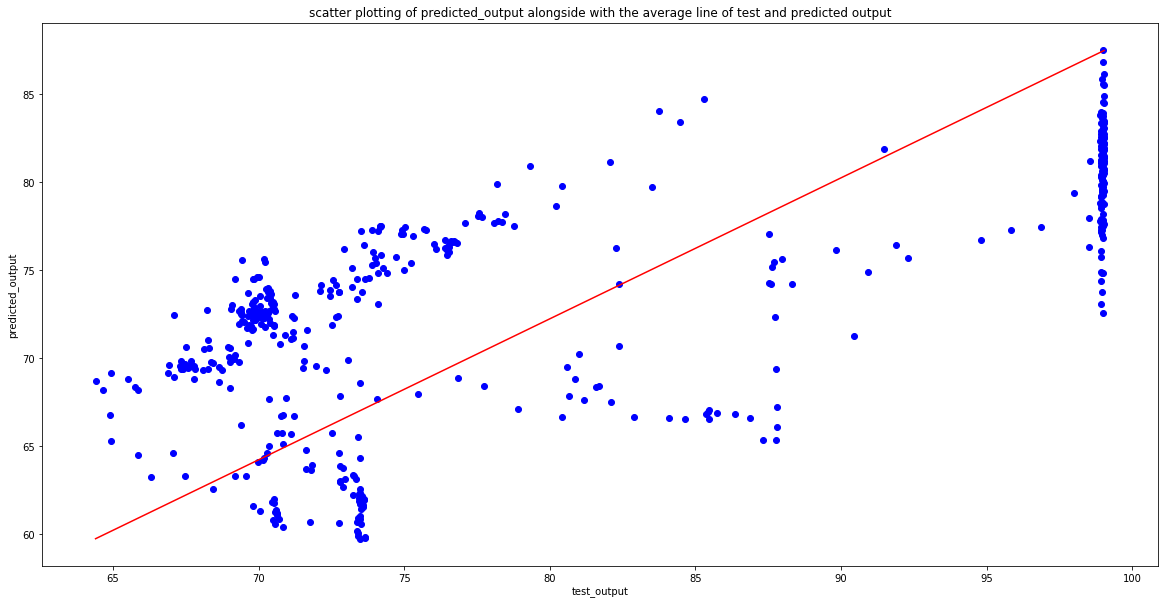

<class 'numpy.ndarray'>


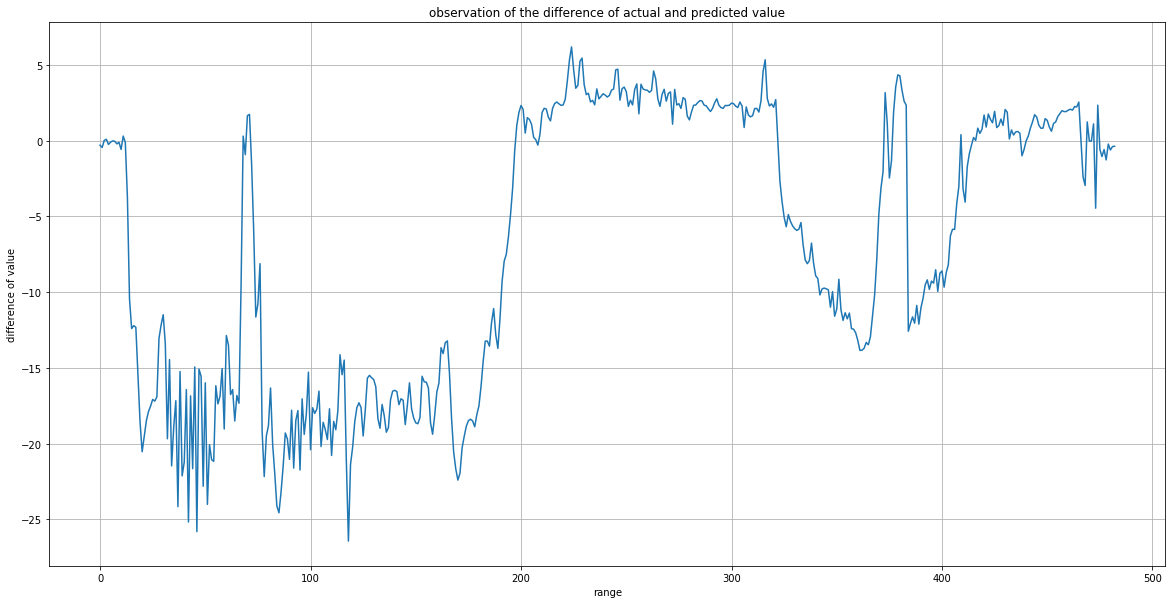

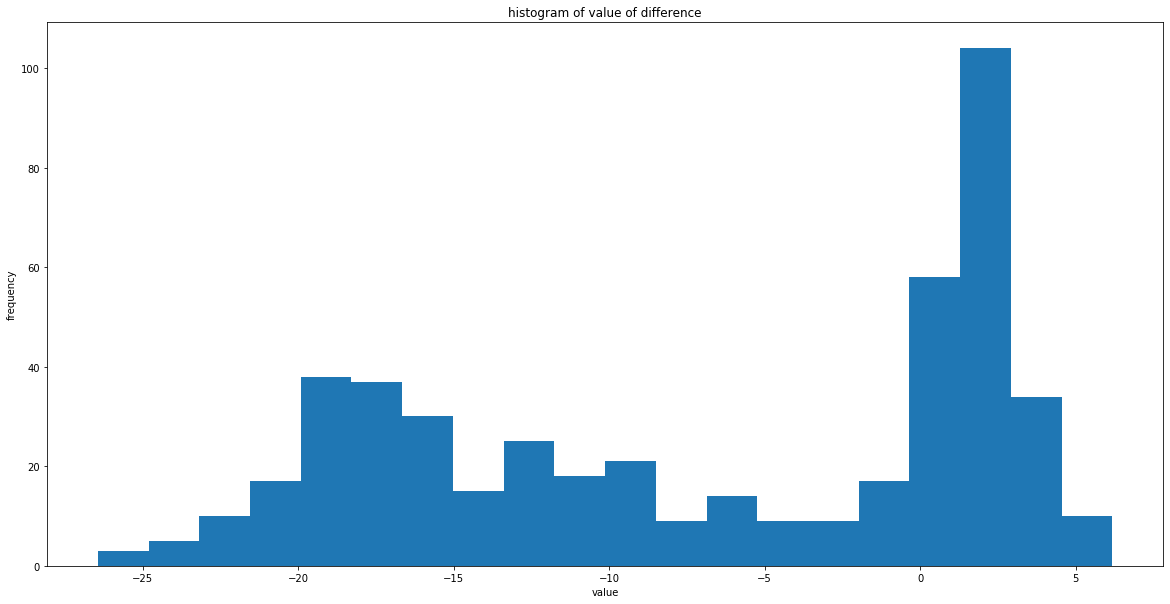

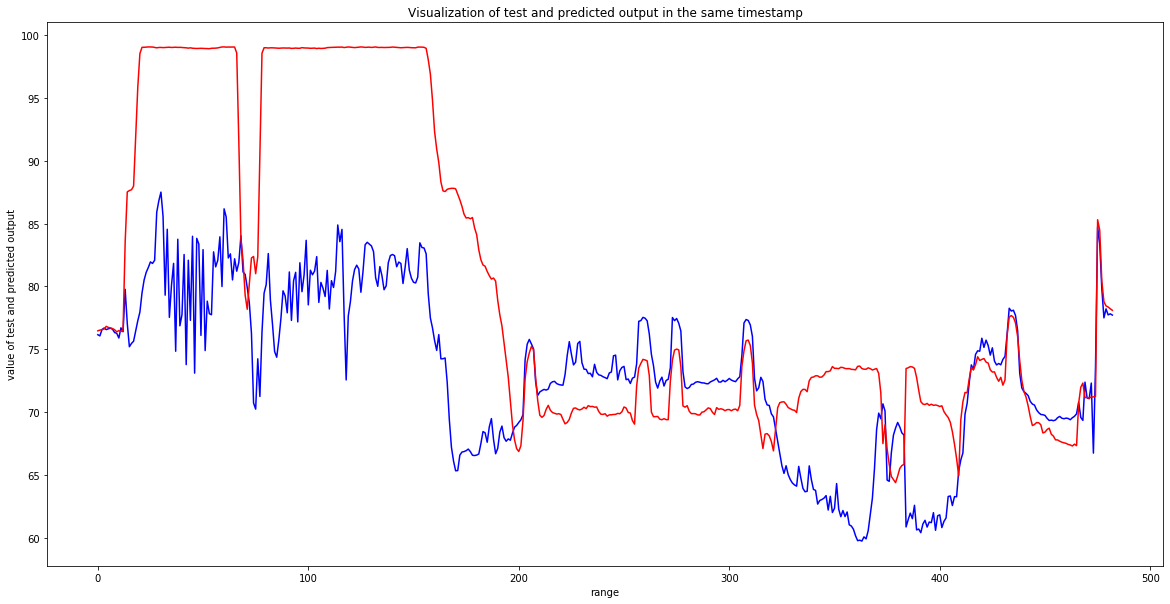

r_2 statistic: 0.14
Mean_absolute_error: 8.68
Mean squared error: 130.66
RMSE:  11.430473854315768
!!!!---------------!!!!----------------!!!!
------- Lasso


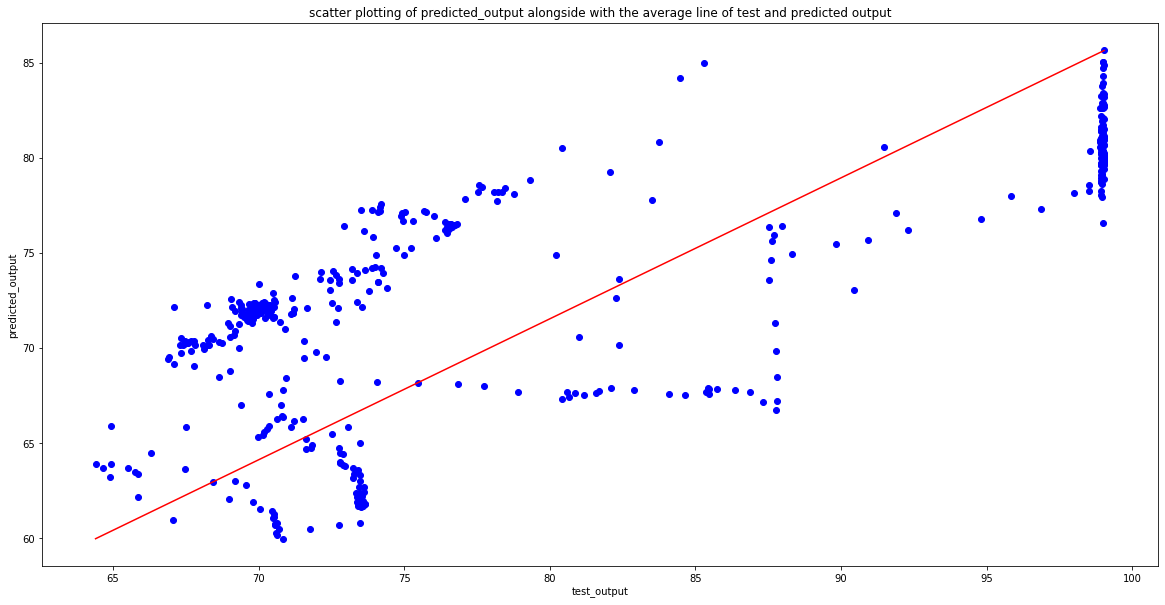

<class 'numpy.ndarray'>


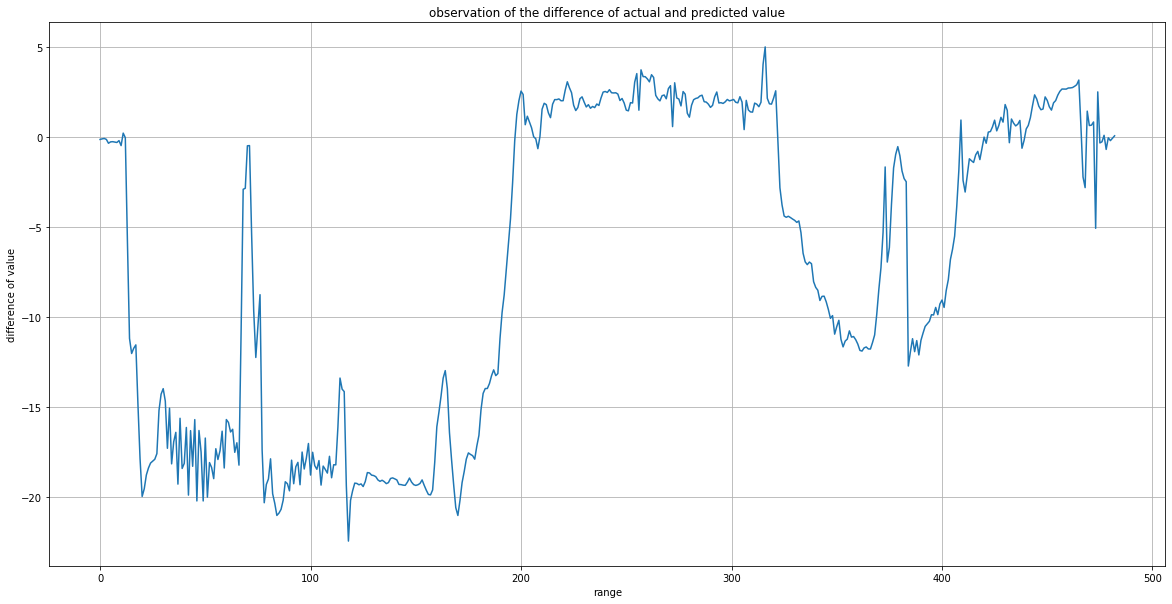

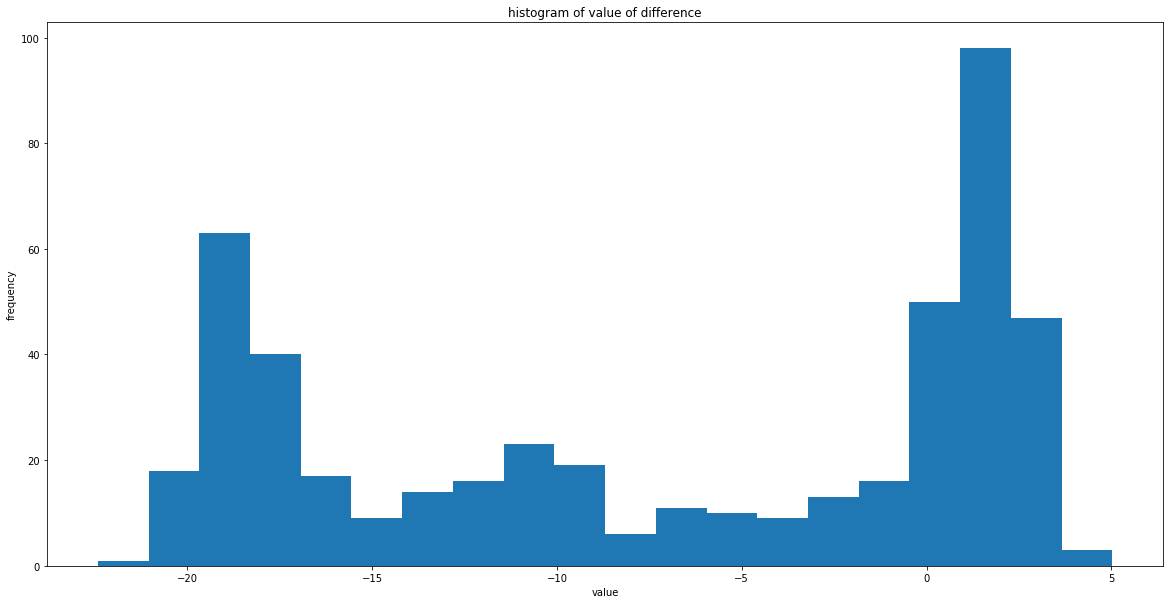

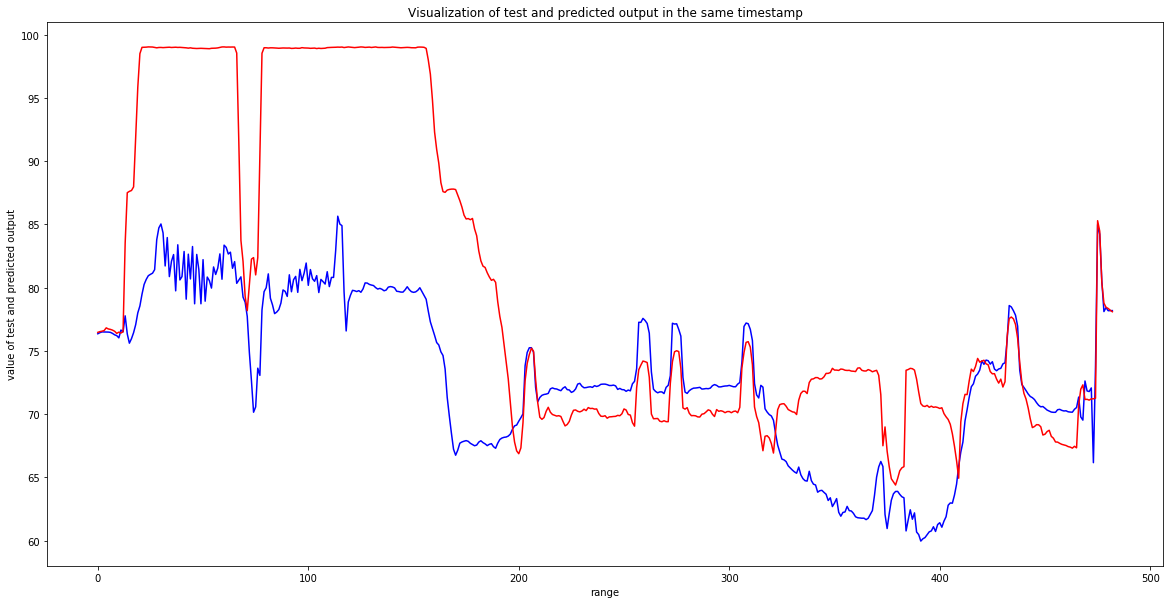

r_2 statistic: 0.16
Mean_absolute_error: 8.52
Mean squared error: 126.97
RMSE:  11.26807818386473
!!!!---------------!!!!----------------!!!!
------- Ridge


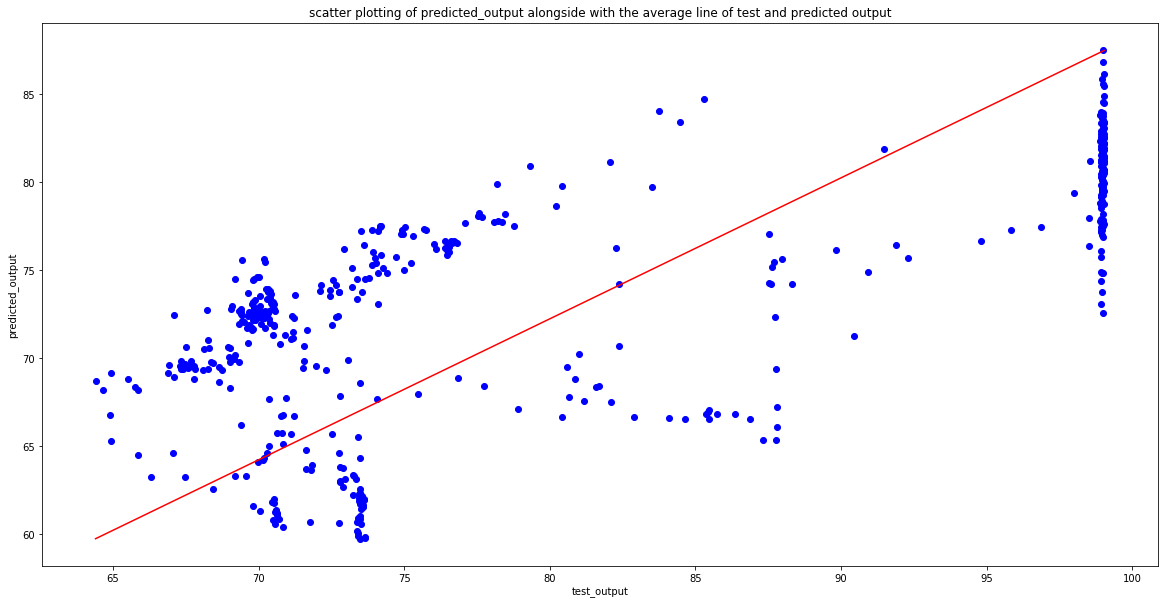

<class 'numpy.ndarray'>


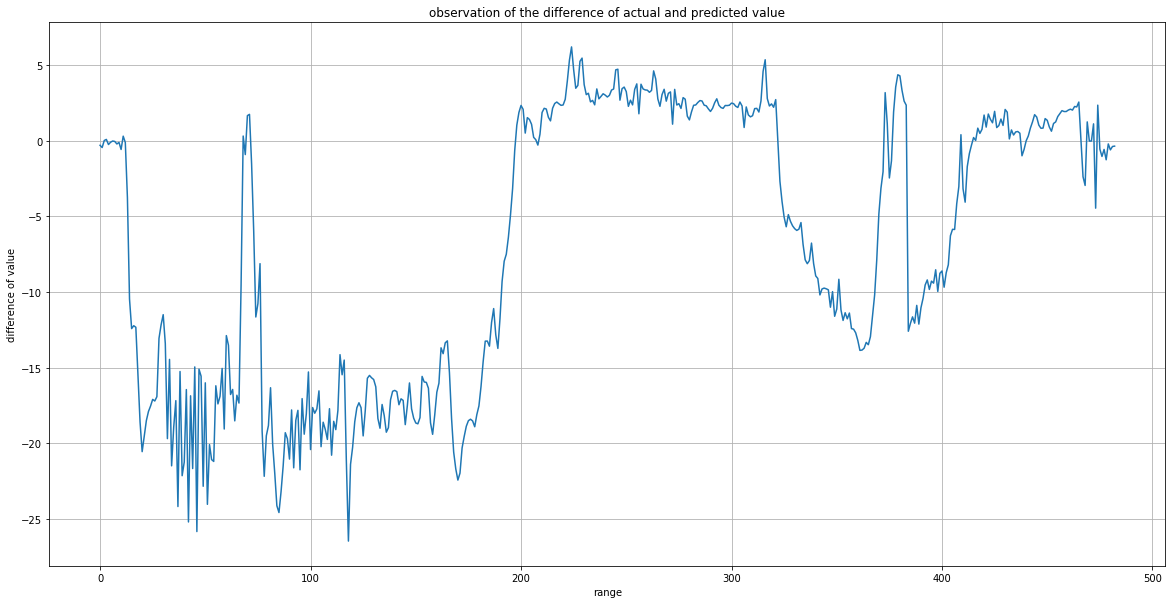

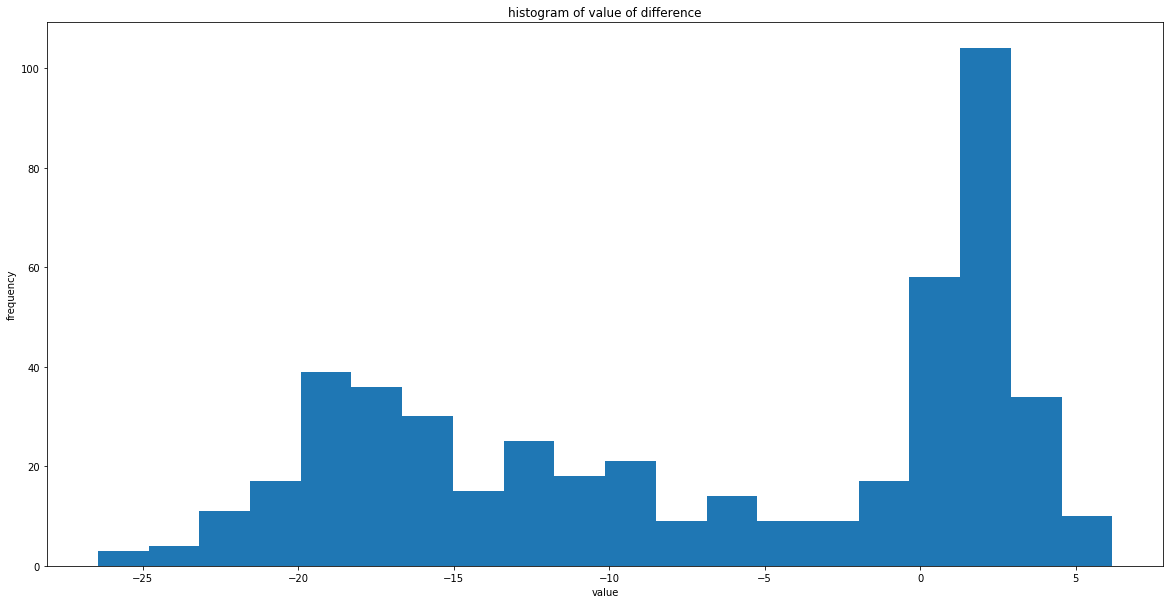

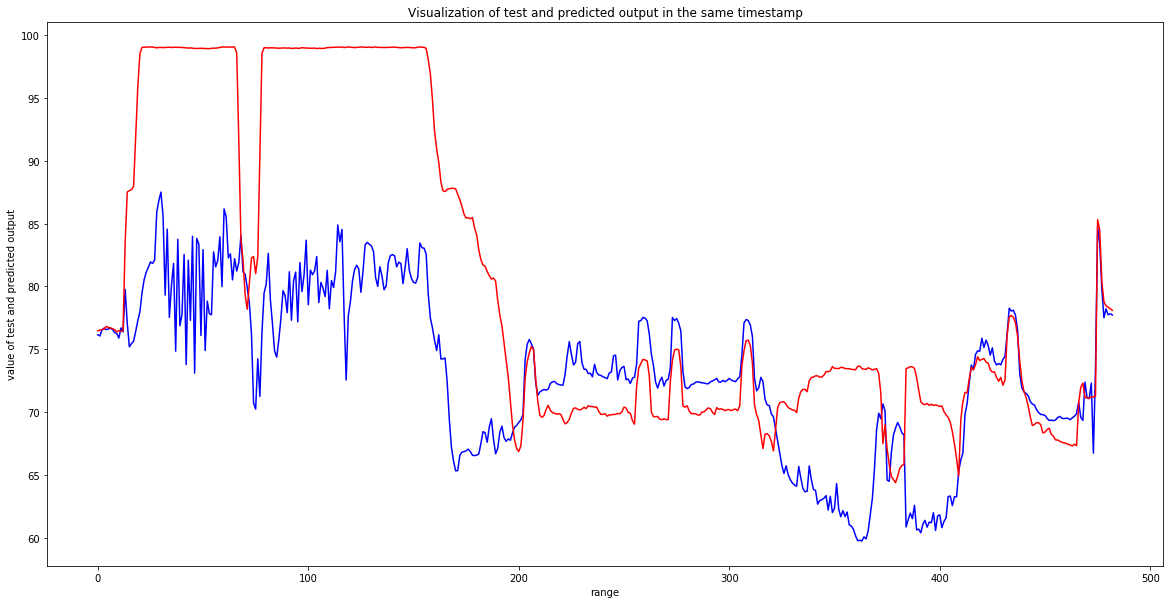

r_2 statistic: 0.14
Mean_absolute_error: 8.68
Mean squared error: 130.65
RMSE:  11.430016871648093
!!!!---------------!!!!----------------!!!!
------- BayesianRidge


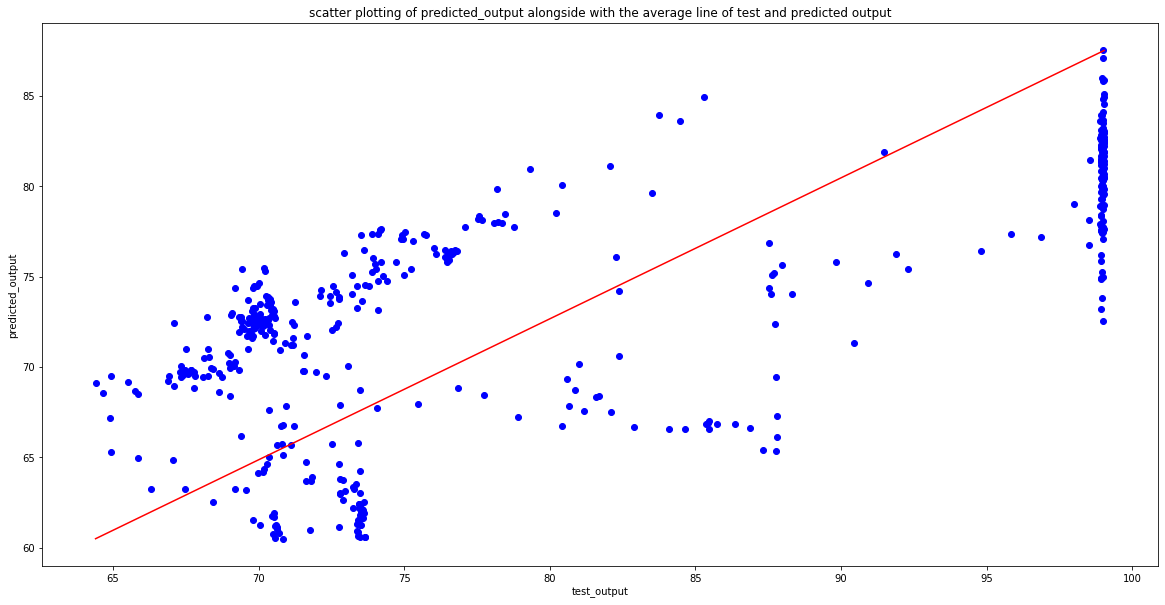

<class 'numpy.ndarray'>


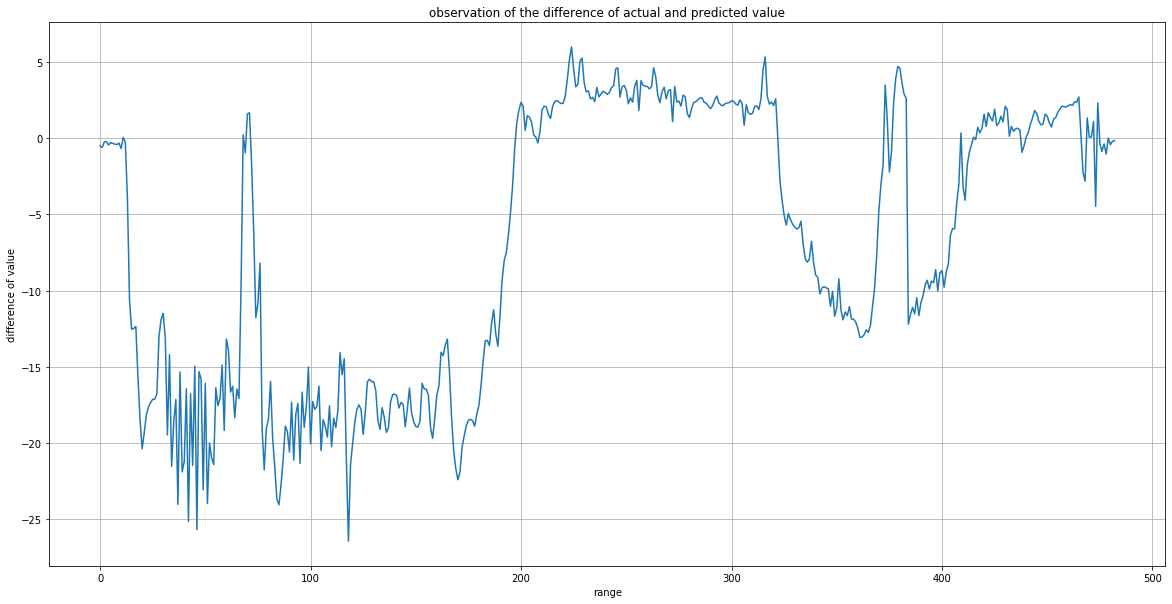

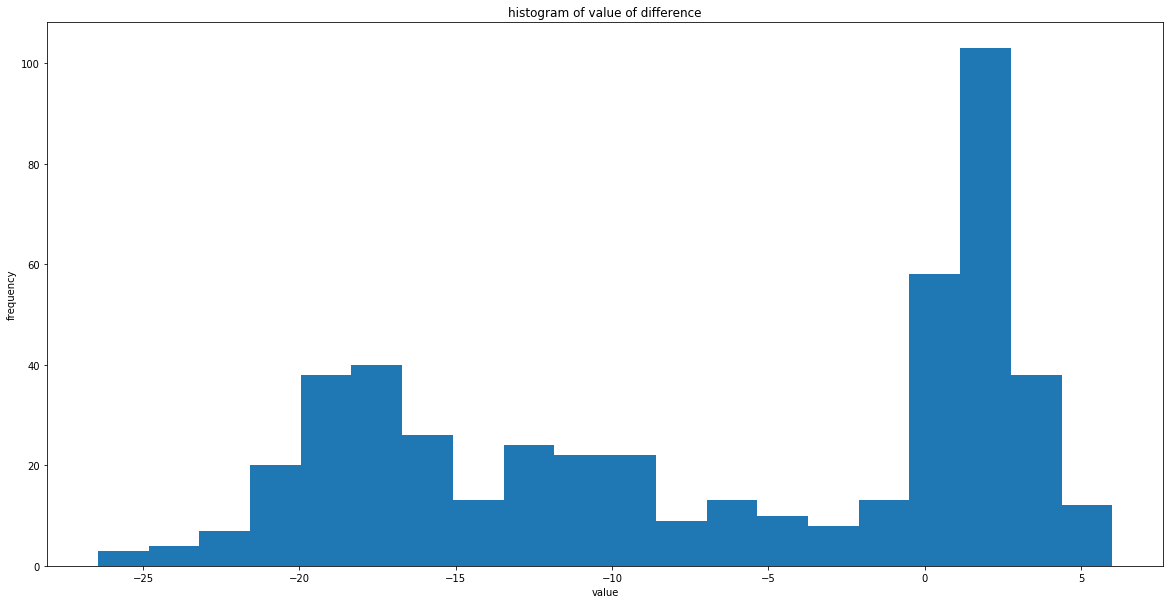

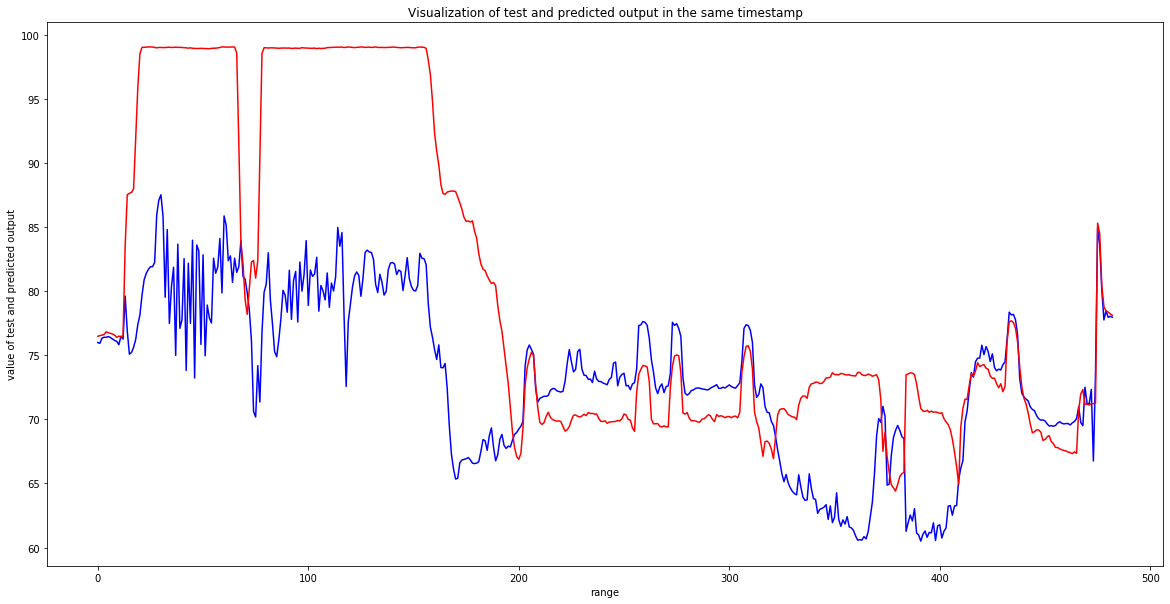

r_2 statistic: 0.14
Mean_absolute_error: 8.67
Mean squared error: 129.93
RMSE:  11.398740957447602
!!!!---------------!!!!----------------!!!!
------- tree


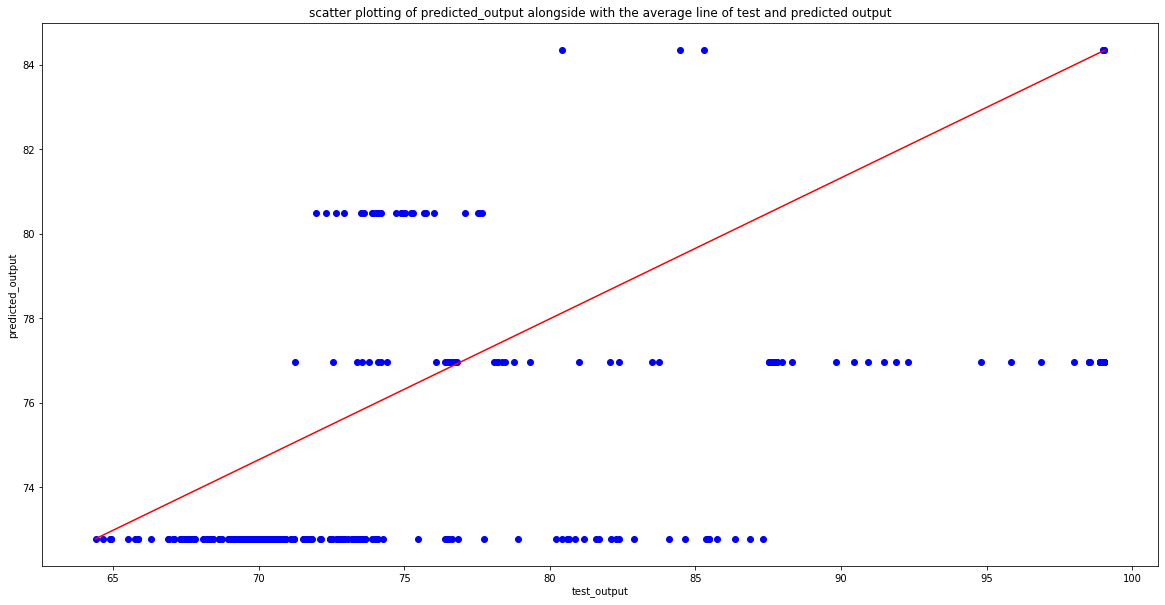

<class 'numpy.ndarray'>


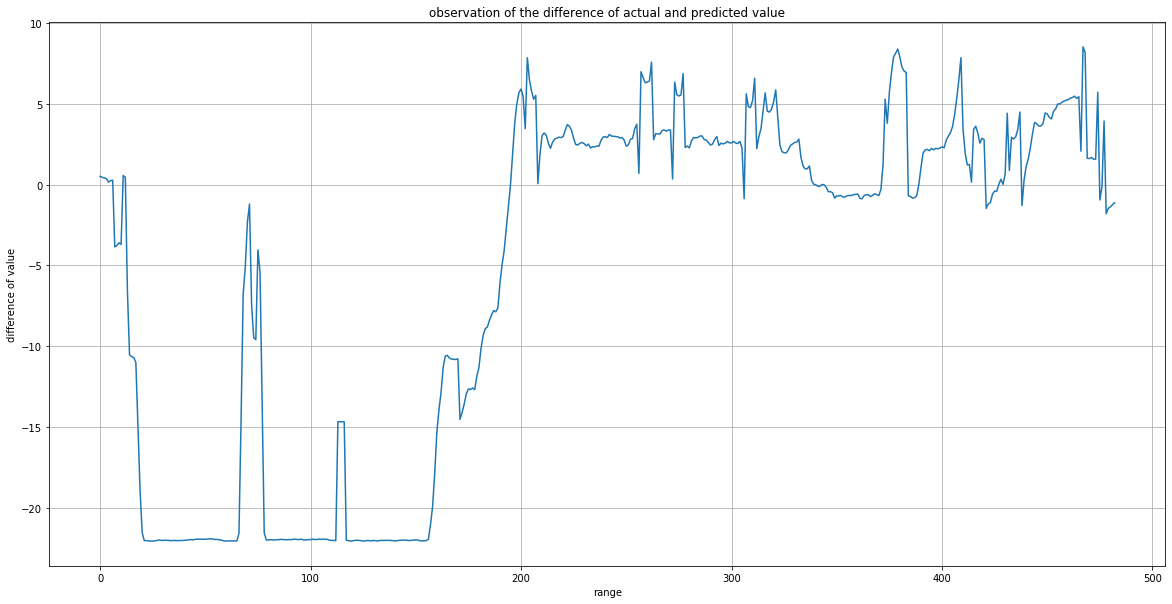

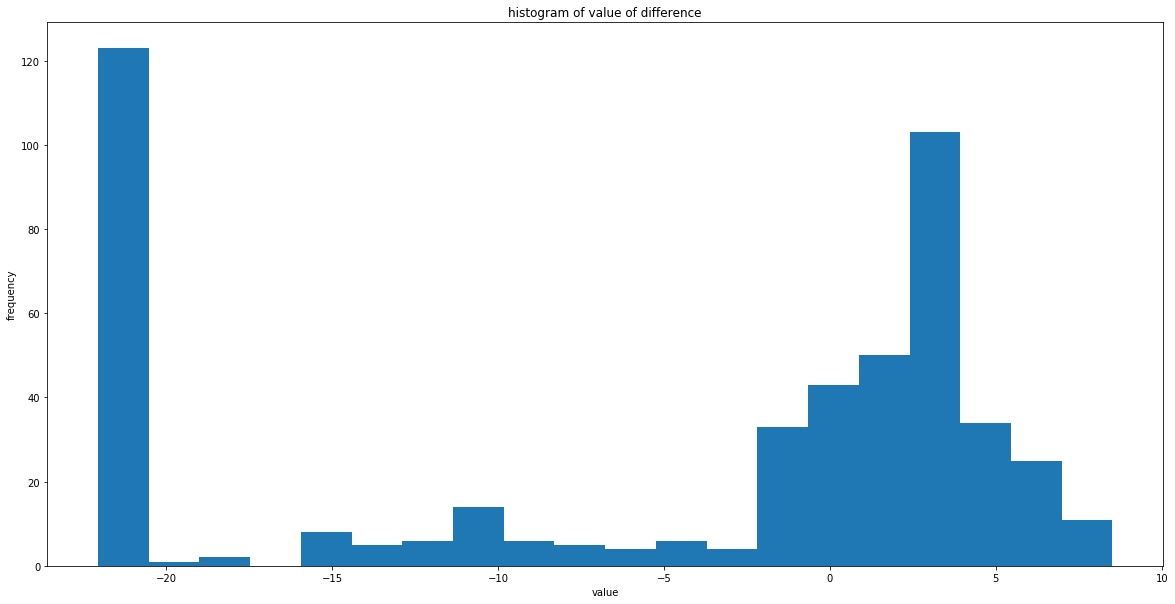

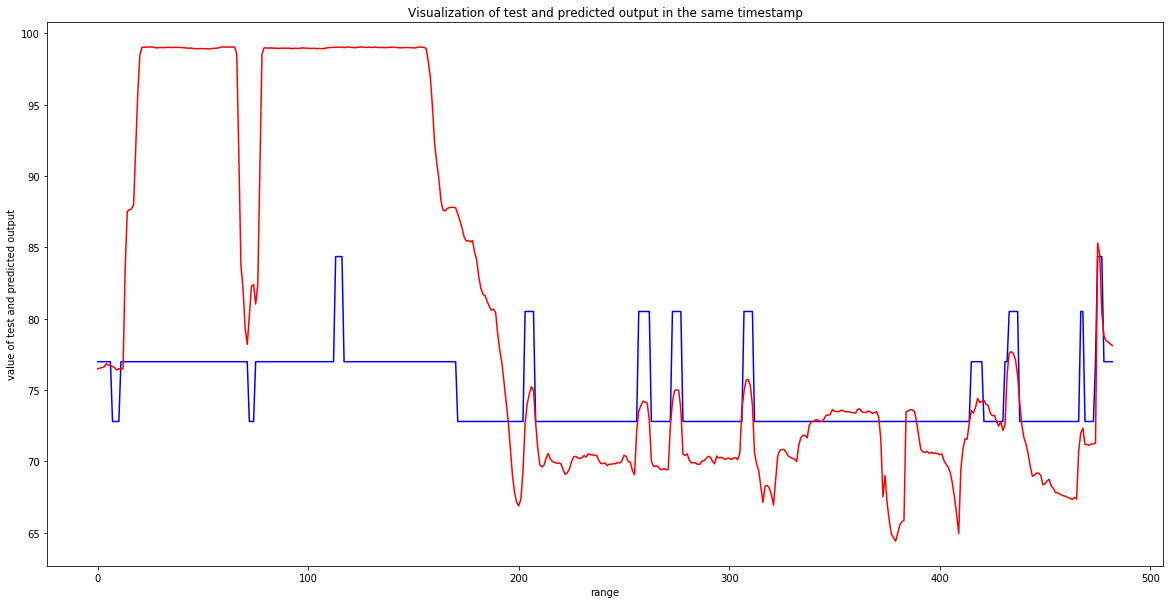

r_2 statistic: 0.04
Mean_absolute_error: 8.65
Mean squared error: 145.82
RMSE:  12.075389158214133
!!!!---------------!!!!----------------!!!!
------- ExtraTreesRegressor


/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


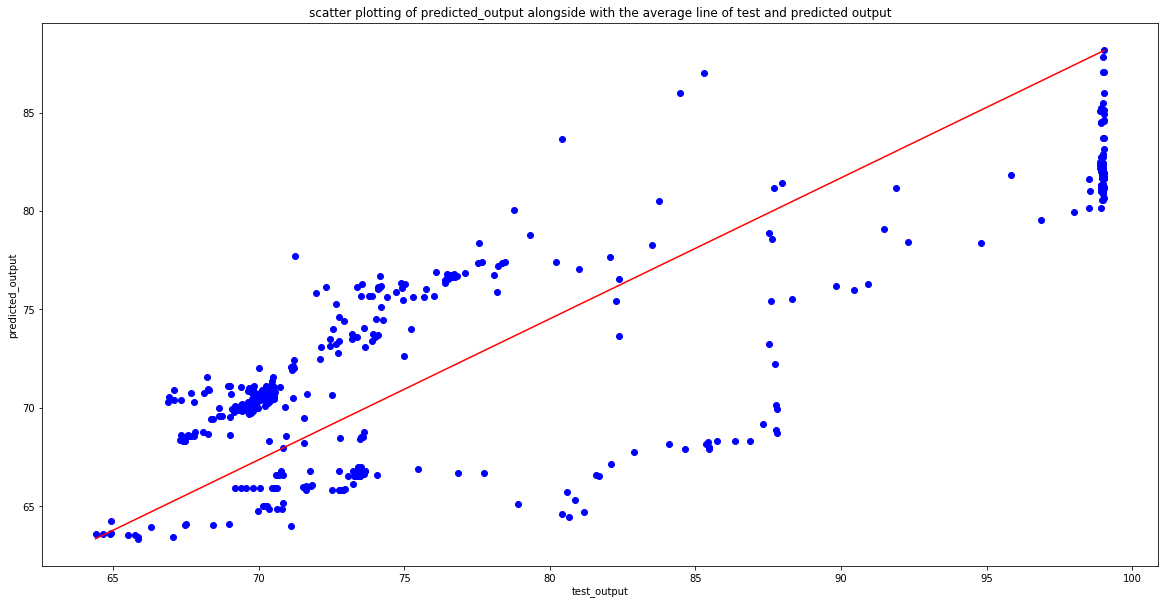

<class 'numpy.ndarray'>


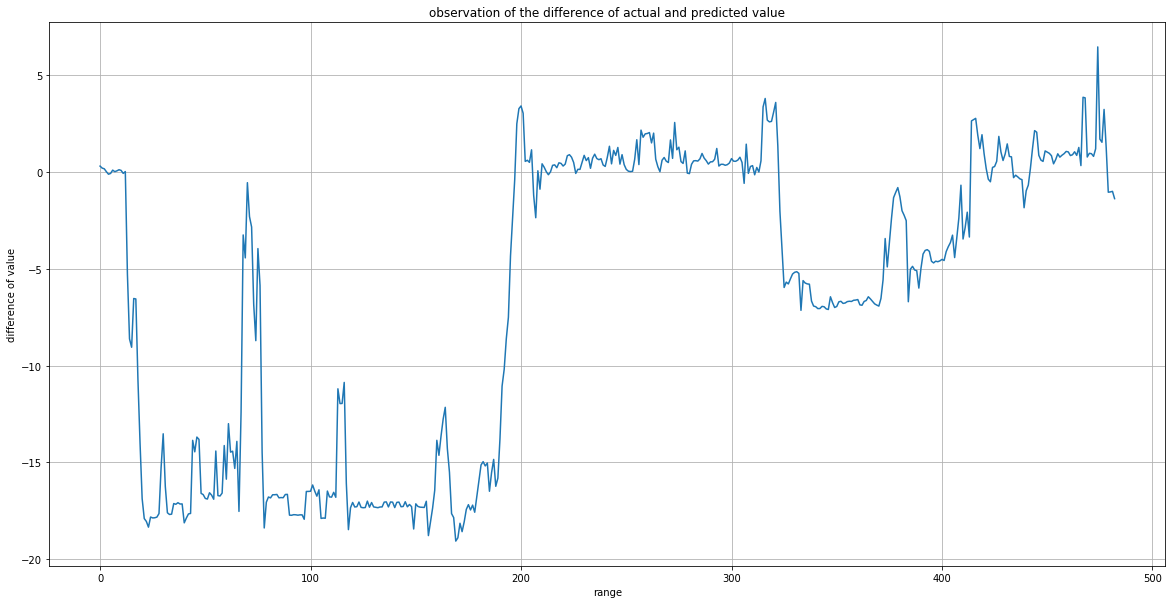

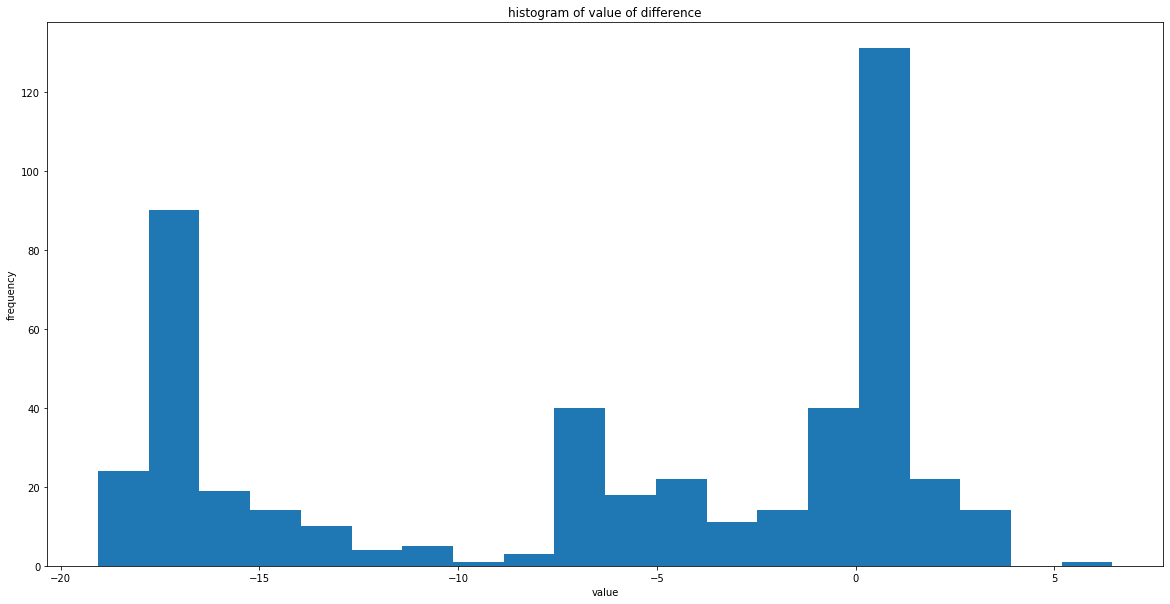

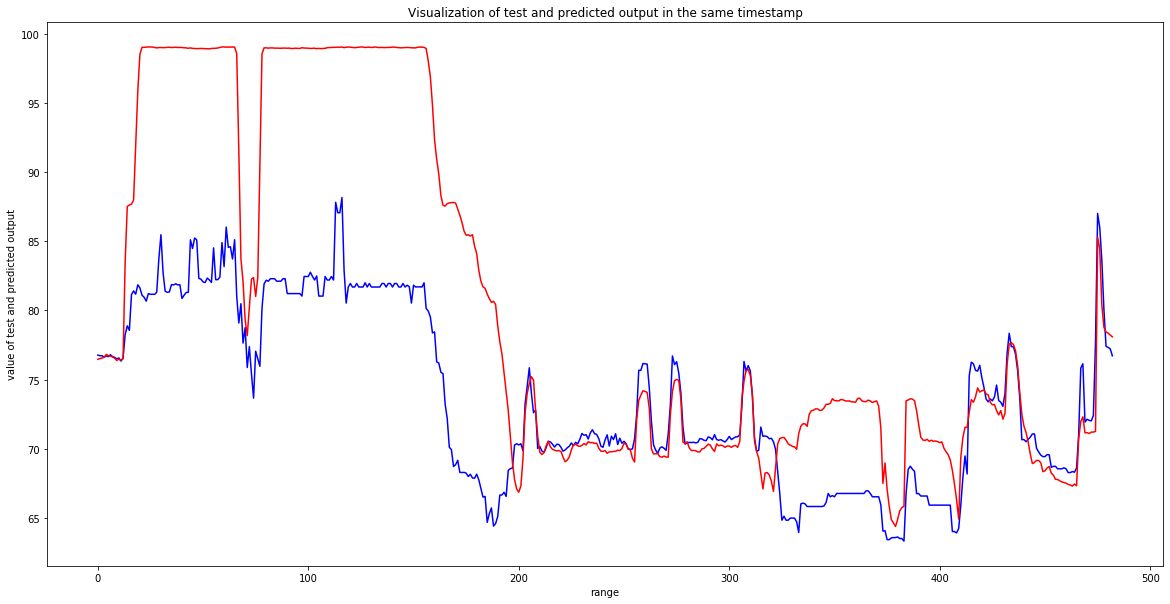

r_2 statistic: 0.33
Mean_absolute_error: 7.22
Mean squared error: 101.44
RMSE:  10.071951029409039
!!!!---------------!!!!----------------!!!!
------- BaggingRegressor


/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-pa

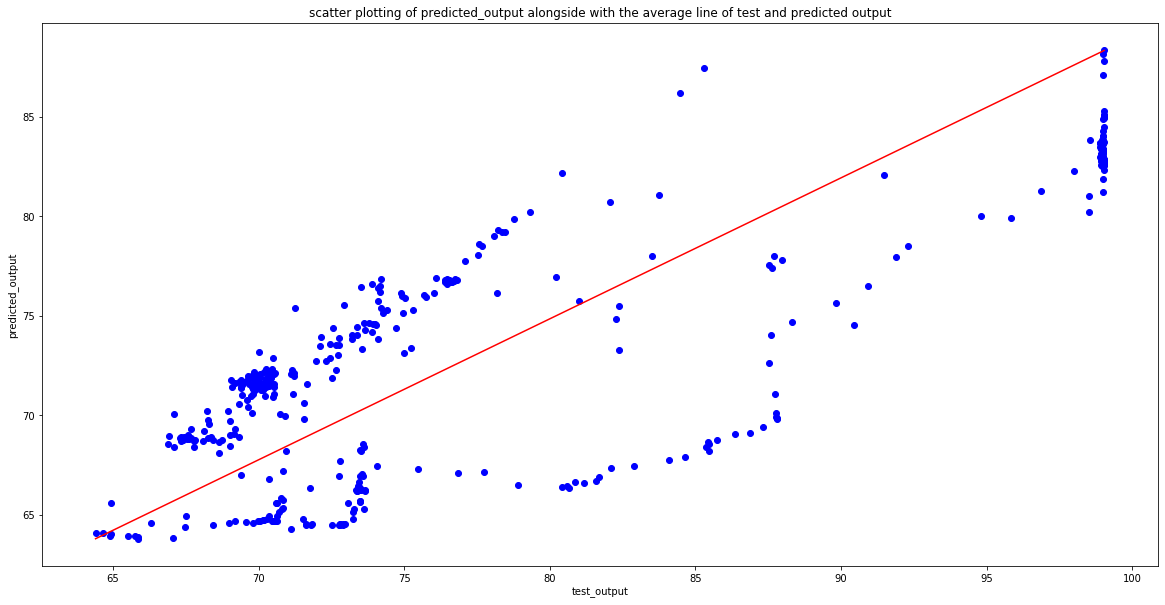

<class 'numpy.ndarray'>


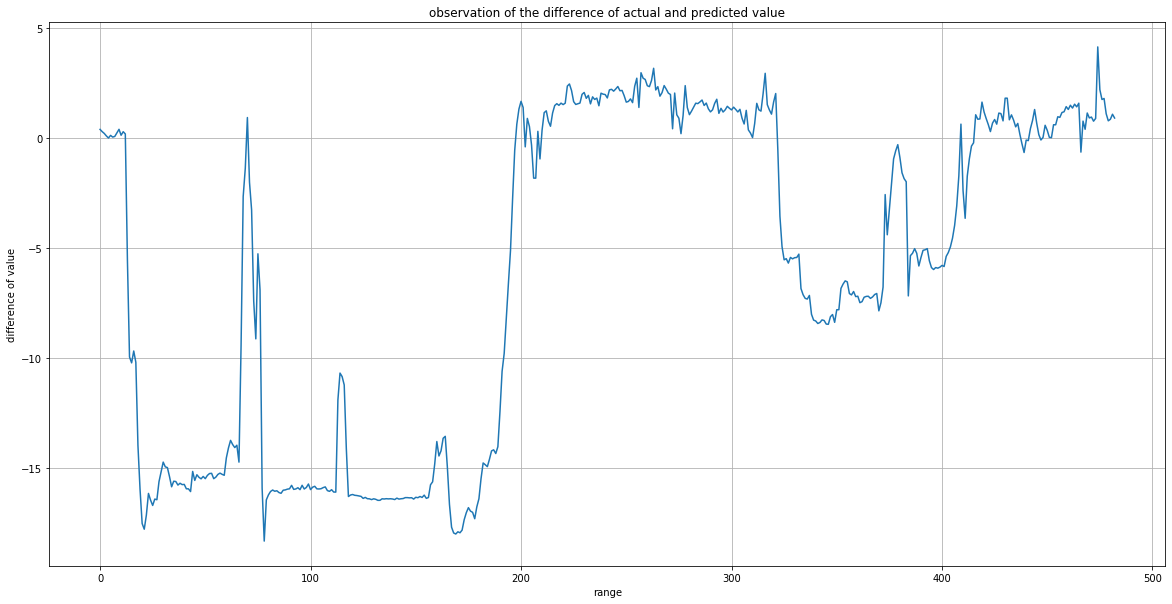

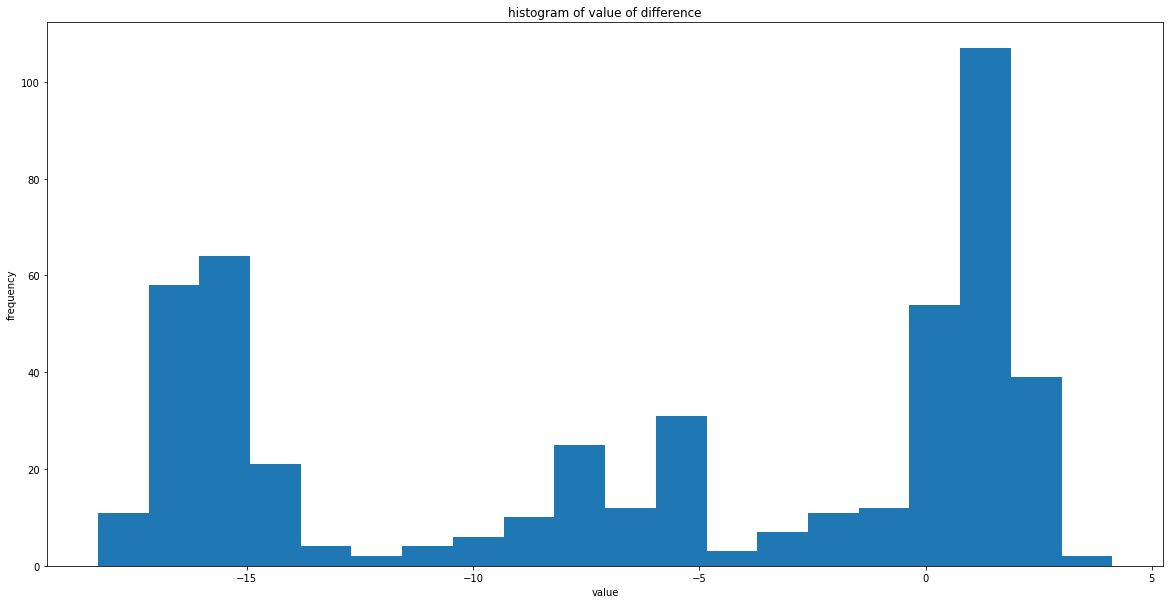

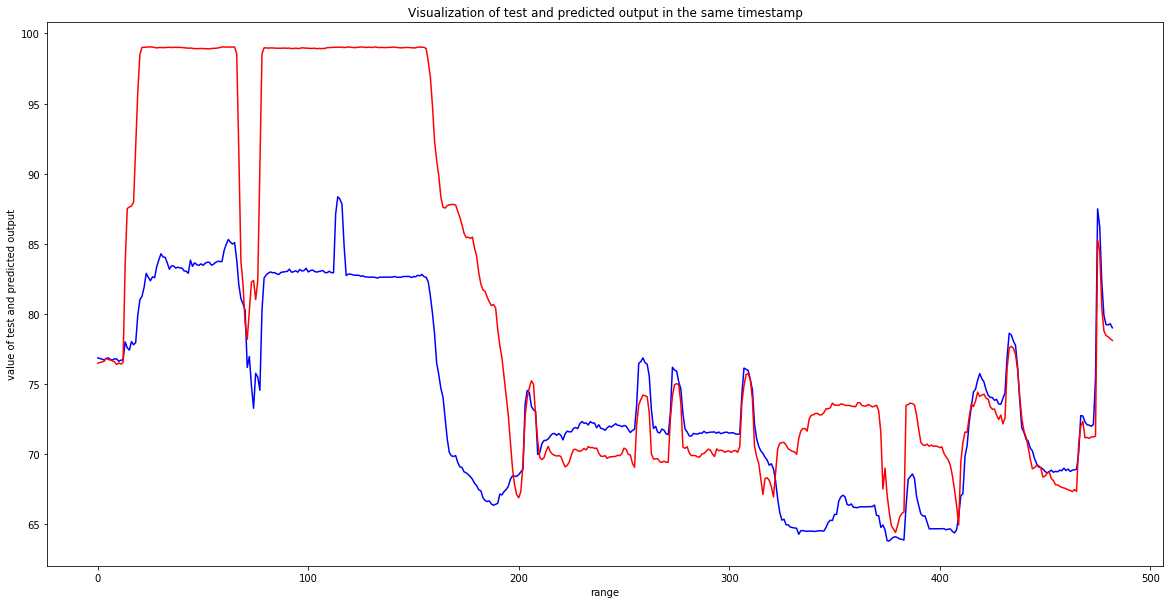

r_2 statistic: 0.38
Mean_absolute_error: 7.19
Mean squared error: 94.01
RMSE:  9.69588495114727
!!!!---------------!!!!----------------!!!!
------- GBR


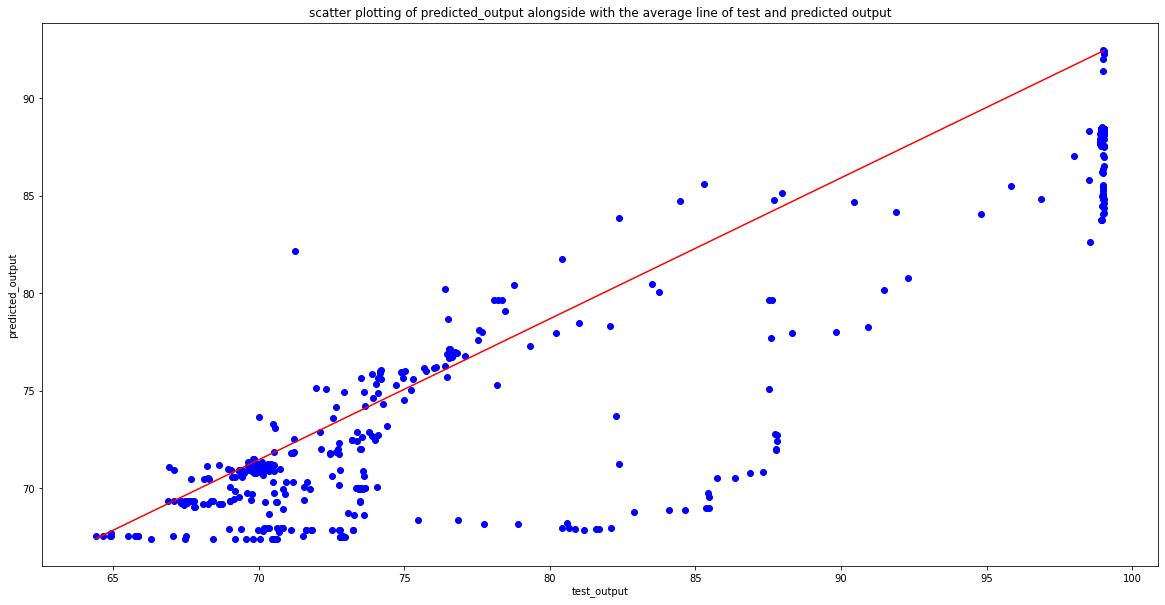

<class 'numpy.ndarray'>


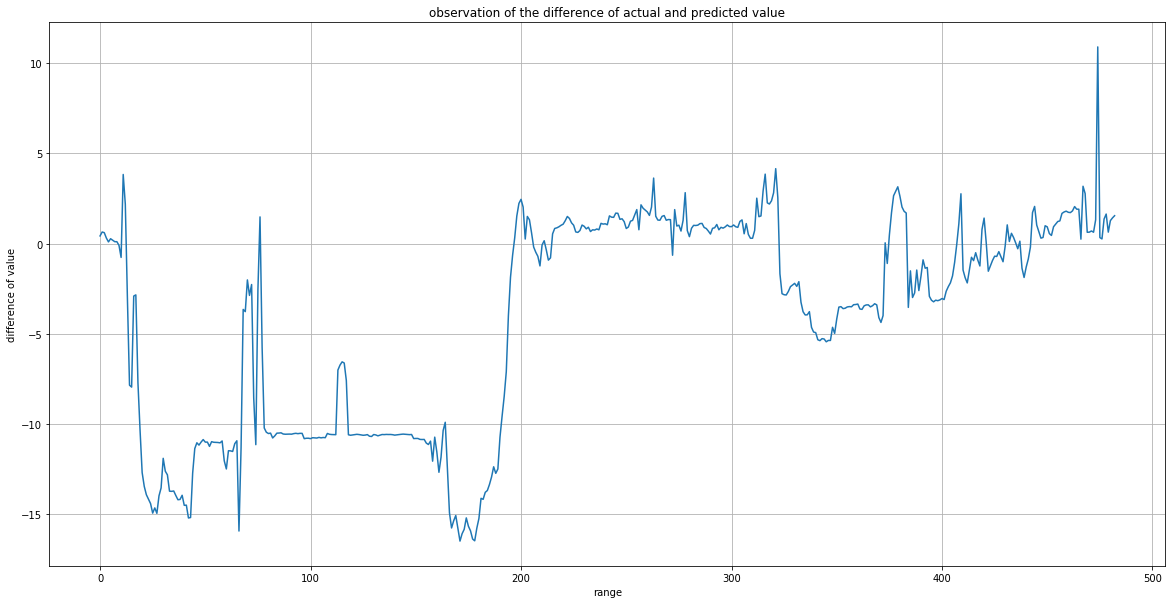

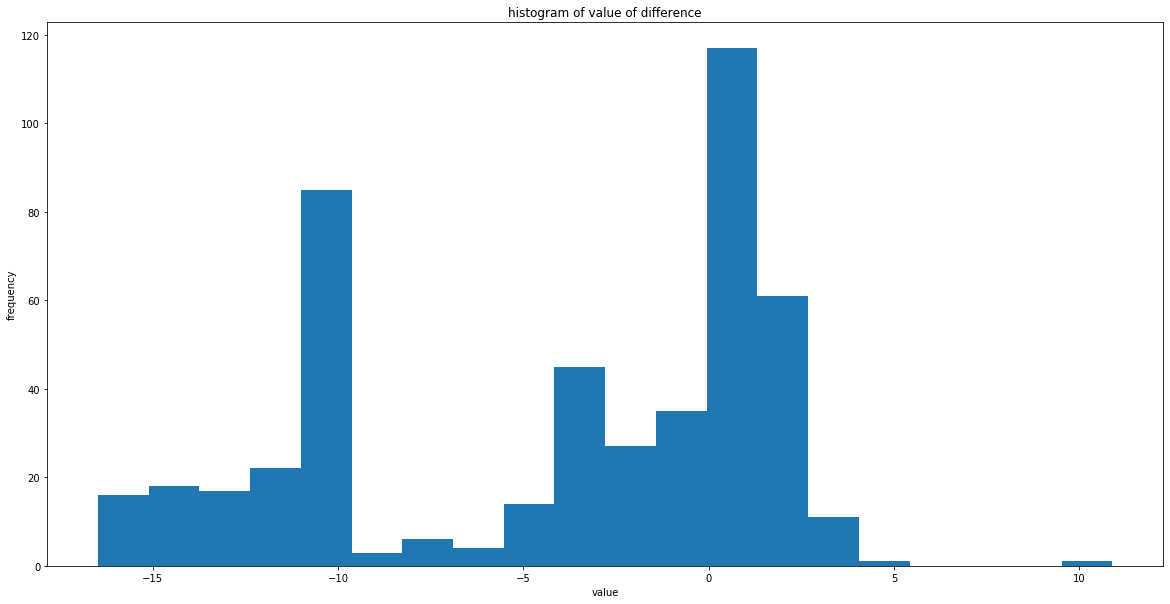

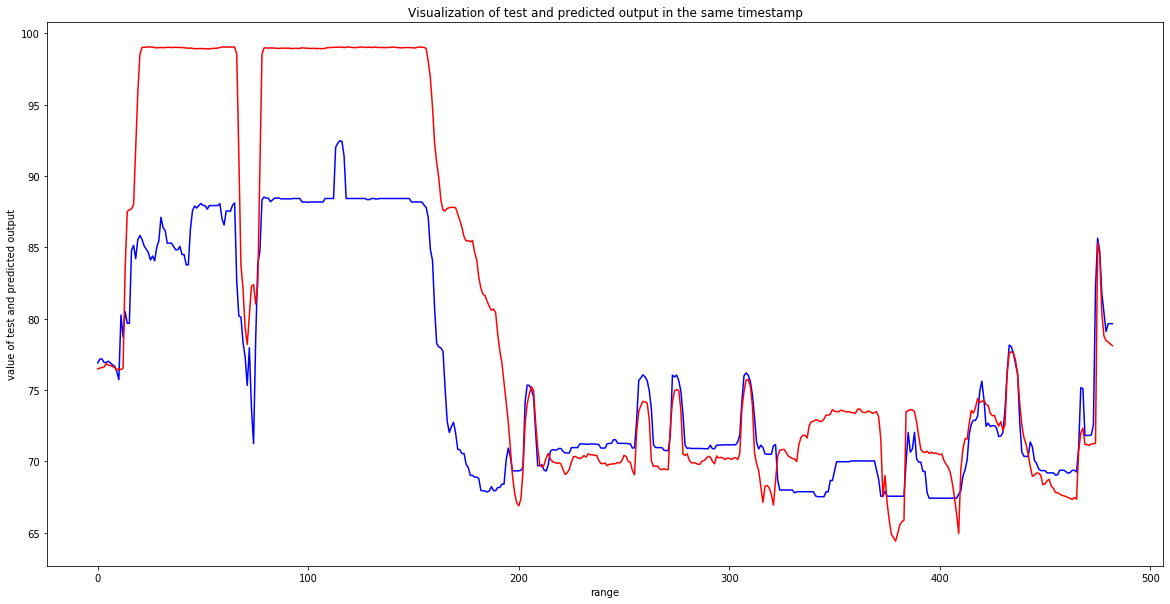

r_2 statistic: 0.65
Mean_absolute_error: 5.25
Mean squared error: 52.53
RMSE:  7.247782864032834
!!!!---------------!!!!----------------!!!!


In [123]:
model = scikit_learn_model(model_list, name, train_input, train_output, test_input, test_output, final_directory, evaluation_metrics_file_path)

In [ ]:
# rowData = dataframe_datetime.loc[ '2019-08-16 11:20:00' :, : ]
# print(type(rowData))
# print(rowData.shape)
# rowData.head(3)

dataframe_high_correlation.tail()

In [ ]:
df = dataframe_date_time_type(dataframe_high_correlation)
# df = dataframe_date_time_type(temp_frame_1)

dict_of_dates = {k: v for k, v in df.groupby('Date')}
dict_of_day_type = {k:v for k,v in df.groupby('TypeofDAY')}
dict_of_day_name = {k:v for k,v in df.groupby('day_name')}


date_key_value = collections.OrderedDict(dict_of_dates)
day_type_key_value = collections.OrderedDict(dict_of_day_type)
day_name_key_value = collections.OrderedDict(dict_of_day_name)

draw_graph_date = draw_graph(date_key_value,dict_of_dates, target_column,final_directory, subfolder_name = 'ai_date_fig_target')
draw_graph_week = draw_graph(day_type_key_value,dict_of_day_type, target_column,final_directory, subfolder_name = 'ai_week_fig_target')
draw_graph_day = draw_graph(day_name_key_value,dict_of_day_name, target_column,final_directory, subfolder_name = 'ai_day_fig_target')

In [111]:
import sklearn

In [128]:
my_model = sklearn.tree.ExtraTreeRegressor()
my_model.fit(train_input, train_output)

ExtraTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                   max_leaf_nodes=None, min_impurity_decrease=0.0,
                   min_impurity_split=None, min_samples_leaf=1,
                   min_samples_split=2, min_weight_fraction_leaf=0.0,
                   random_state=None, splitter='random')

In [129]:
my_pred = my_model.predict(test_input)

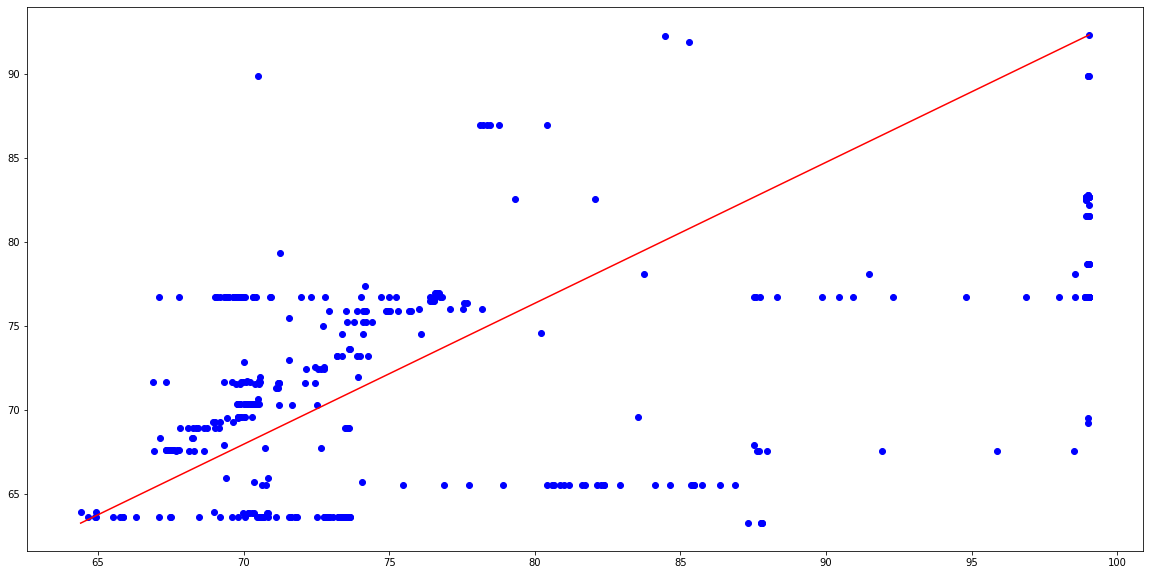

In [130]:
plt.plot((min(test_output), max(test_output)), (min(my_pred), max(my_pred)), color='red')
plt.scatter(test_output, my_pred, color='blue')

In [131]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(test_output,my_pred))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,my_pred))
print("Mean squared error: %.2f" % mean_squared_error(test_output,my_pred))
RMSE=math.sqrt(mean_squared_error(test_output,my_pred))
print('RMSE: ',RMSE)

r_2 statistic: -0.09
Mean_absolute_error: 9.53
Mean squared error: 165.88
RMSE:  12.879490420141632


In [99]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [101]:
lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs= 30

# define model
def NN_model():
    NN_model = Sequential()
    NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train_input.shape[1], activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#     NN_model.add(Dense(1, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(1))
    return NN_model
NN_model=NN_model()
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1024      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 165,889
Trainable params: 165,889
Non-trainable params: 0
_________________________________________________________________


In [102]:
NN_model.fit(train_input, train_output, epochs=epochs, batch_size=batch_size)

W0827 17:12:52.754102 139649760978752 deprecation_wrapper.py:119] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:958: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0827 17:12:52.777830 139649760978752 deprecation.py:506] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:680: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/30
23644/23644 [==============================] - 7s 290us/step - loss: 3.4765 - mean_absolute_error: 3.4765 - acc: 0.0000e+00
Epoch 2/30
23644/23644 [==============================] - 6s 263us/step - loss: 2.5114 - mean_absolute_error: 2.5114 - acc: 0.0000e+00
Epoch 3/30
23644/23644 [==============================] - 6s 254us/step - loss: 2.5753 - mean_absolute_error: 2.5753 - acc: 0.0000e+00
Epoch 4/30
23644/23644 [==============================] - 6s 267us/step - loss: 2.4441 - mean_absolute_error: 2.4441 - acc: 0.0000e+00
Epoch 5/30
23644/23644 [==============================] - 6s 260us/step - loss: 2.4367 - mean_absolute_error: 2.4367 - acc: 0.0000e+00
Epoch 6/30
23644/23644 [==============================] - 6s 256us/step - loss: 2.3330 - mean_absolute_error: 2.3330 - acc: 0.0000e+00
Epoch 7/30
23644/23644 [==============================] - 6s 256us/step - loss: 2.3954 - mean_absolute_error: 2.3954 - acc: 0.0000e+00
Epoch 8/30
23644/23644 [==============================]

In [103]:
predicted_output = NN_model.predict(test_input)

In [104]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output))
print('RMSE: ',RMSE)

r_2 statistic: 0.54
Mean_absolute_error: 6.62
Mean squared error: 70.51
RMSE:  8.39731564994832


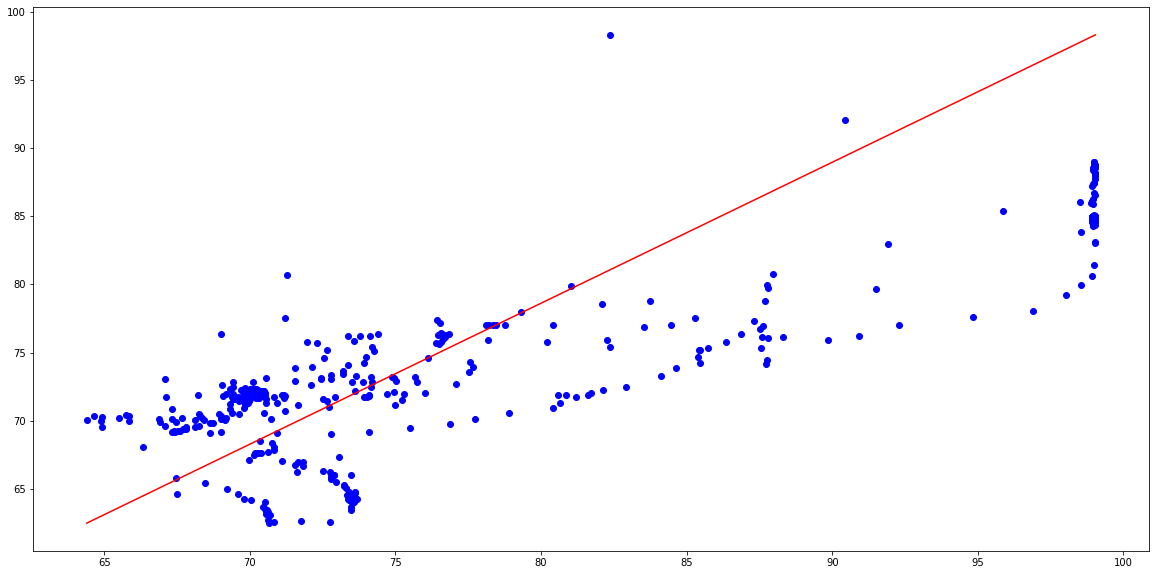

In [105]:
plt.plot((min(test_output), max(test_output)), (min(predicted_output), max(predicted_output)), color='red')
plt.scatter(test_output, predicted_output, color='blue')

In [ ]:
dataframe_datetime.tail()

In [ ]:
dataframe_datetime.iloc[0:5000].plot(y = dataframe_datetime.columns[-1], use_index=True)
plt.rcParams['figure.figsize'] =(15,5)